In [32]:
import pandas as pd
# Panda, Panda
# Panda, Panda, Panda, Panda, Panda
import numpy as np
# I got numpy in Atlanta 

## Random Forest to predict Crime 

In [33]:
INC = pd.read_csv('Data/Incidents.csv')
INC.head()

,Unnamed: 0,FID,Join_Count,TARGET_FID,Join_Cou_1,TARGET_F_1,incident_i,case_numbe,incident_d,incident_t,...,PRECIPITATIONIN,EVENTS,MEAN_VISIBILITYMILES,CityName,ZipCode2,IncidentGroup2,TotalPoverty,Weatherstr,weatherEventGroup,ZoningGroup
0,0,0,1,0,1,1,787108492,59881,12/30/2016 01:49:00 PM,INFORMATION REPORT,...,0.00,NaN,10.0,DUNWOODY,30346,Other,598.0,NaN,NaN,Office
1,1,1,1,1,1,2,787300346,59906,01/01/2017 01:00:00 AM,INFORMATION REPORT,...,NaN,NaN,NaN,DUNWOODY,30346,Other,874.0,NaN,NaN,Office
2,2,2,1,2,0,3,787147954,59892,12/31/2016 02:12:00 AM,FAMILY OFFENSE-NO VIOLENCE,...,0.17,Rain,9.0,DUNWOODY,30338,Family_Offense,66.5,Rain,Rain,
3,3,3,1,3,0,4,787174660,59898,12/31/2016 09:39:00 AM,SPEEDING,...,0.17,Rain,9.0,DUNWOODY,0,Traffic,12.0,Rain,Rain,
4,4,4,1,4,0,5,762180594,54597,06/13/2016 06:07:00 PM,FAIL TO YIELD TURNING LEFT,...,0.00,NaN,10.0,DUNWOODY,30346,Traffic,272.0,NaN,NaN,


In [34]:
INC.shape

(93014, 55)

In [35]:
INC.dtypes

Unnamed: 0                int64
FID                       int64
Join_Count                int64
TARGET_FID                int64
Join_Cou_1                int64
TARGET_F_1                int64
incident_i                int64
case_numbe                int64
incident_d               object
incident_t               object
incident_1               object
address                  object
city                     object
state                    object
zip                       int64
latitude                float64
longitude               float64
hour_of_da                int64
day_of_wee               object
parent_inc               object
date_incid               object
SOURCE_ID                 int64
Gi_Bin                    int64
B25057e1                float64
B25058e1                float64
B25059e1                float64
B25076e1                float64
B25077e1                float64
B25078e1                float64
B25018e1                float64
B25001e1                float64
B25002e1

### Select Columns for Model

In [36]:
ColstoKeep = ['incident_d', 'Join_Count', 'ZipCode2', 'latitude', 'longitude', 'hour_of_da', 'day_of_wee', 'date_incid', 
              'B25057e1', 'B25058e1', 'B25059e1', 'B25076e1', 'B25077e1', 'B25078e1', 'B25018e1', 'B25001e1', 'B25002e1', 'B25002e2', 'B25002e3', 'B19013e1',
              'EST', 'MAX_TEMPERATUREF', 'PRECIPITATIONIN', 'MEAN_VISIBILITYMILES', 
              'CityName', 'IncidentGroup2', 'TotalPoverty', 'weatherEventGroup', 'ZoningGroup']
data = INC[ColstoKeep]
data.head()

,incident_d,Join_Count,ZipCode2,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,...,B19013e1,EST,MAX_TEMPERATUREF,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup
0,12/30/2016 01:49:00 PM,1,30346,33.927104,-84.331795,13,Friday,2016-12-30 00:00:00,938.5,1083.0,...,55712.5,2016-12-30,50.0,0.00,10.0,DUNWOODY,Other,598.0,NaN,Office
1,01/01/2017 01:00:00 AM,1,30346,33.930271,-84.332347,1,Sunday,2017-01-01 00:00:00,911.0,1041.0,...,67422.0,NaN,NaN,NaN,NaN,DUNWOODY,Other,874.0,NaN,Office
2,12/31/2016 02:12:00 AM,1,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,527.0,...,85000.5,2016-12-31,47.0,0.17,9.0,DUNWOODY,Family_Offense,66.5,Rain,
3,12/31/2016 09:39:00 AM,1,0,33.943571,-84.331624,9,Saturday,2016-12-31 00:00:00,951.0,1046.5,...,111182.0,2016-12-31,47.0,0.17,9.0,DUNWOODY,Traffic,12.0,Rain,
4,06/13/2016 06:07:00 PM,1,30346,33.926443,-84.337153,18,Monday,2016-06-13 00:00:00,922.5,1108.0,...,67008.5,2016-6-13,99.0,0.00,10.0,DUNWOODY,Traffic,272.0,NaN,


Number of Incidents

In [37]:
data['Join_Count'].value_counts()
# Join Count is column from Index Grid Join

1    93012
2        2
Name: Join_Count, dtype: int64

In [38]:
INC['IncidentGroup2'].value_counts()
# Count of Crimes by type

Theft                   25150
Traffic                 17968
Other                   13026
Property_Crime          11218
Breaking_Enter           5537
Disorder                 5316
Assault                  5201
Traffic_DUI              2826
Family_Offense           2709
Drugs                    1481
Robbery                   831
Missing Person            686
Vehicle Recovery          278
Quality of Life           277
Death                     159
Weapons Offense           154
Other Sexual Offense       72
Liquor                     53
Arson                      37
Homicide                   18
Sexual Offense             16
Proactive Policing          1
Name: IncidentGroup2, dtype: int64

https://www.youtube.com/watch?v=YPItfQ87qjM

**dataM** Data Frame with Top 10 Incidents

In [39]:
# old way
# Categories[
#            (Categories.IncidentGroup2 == "Theft") | 
#            (Categories.IncidentGroup2 == "Traffic") |
#            (Categories.IncidentGroup2 == "Property Crime") |
#            (Categories.IncidentGroup2 == "Breaking & Entering") |
#            (Categories.IncidentGroup2 == "Disorder") | 
#            (Categories.IncidentGroup2 == "Assault") |
#            (Categories.IncidentGroup2 == "Traffic - DUI") |
#            (Categories.IncidentGroup2 == "Family Offense") |
#            (Categories.IncidentGroup2 == "Drugs")
# ].head(20)

# better way
valuesToKeep = ["Theft","Traffic","Property_Crime","Breaking_Enter","Disorder","Assault",
               "Traffic_DUI", "Family_Offense","Drugs", "Robbery"]

dataM = data[ data.IncidentGroup2.isin(valuesToKeep) ]
dataM.IncidentGroup2.unique()

# Keeping top 10 Crimes for model

array(['Family_Offense', 'Traffic', 'Disorder', 'Theft', 'Assault',
       'Property_Crime', 'Breaking_Enter', 'Drugs', 'Traffic_DUI',
       'Robbery'], dtype=object)

Total of 93,014 Incidents in Sandy Springs and Dunwoody from 2010 to 2016 <br/>
Select out Top 10 Crimes - left with 78,237 records

In [40]:
print data.shape
print dataM.shape

(93014, 29)
(78237, 29)


Should have spatial joined the Incident points to a Zip Code layer - I don't expect Zip Code to be significant <br/>
Zip Codes that has less than 100 Incident events were classified as 0. 

In [41]:
dataM['ZipCode2'].value_counts()

0        53665
30338     9084
30346     8772
30360     2171
30328     1979
30350     1646
30342      769
30327      151
Name: ZipCode2, dtype: int64

In [42]:
print data.weatherEventGroup.value_counts()
print dataM.weatherEventGroup.value_counts()

Rain    28900
Fog      5514
Snow      532
Name: weatherEventGroup, dtype: int64
Rain    24268
Fog      4670
Snow      448
Name: weatherEventGroup, dtype: int64


In [43]:
print "ORIGINAL {} no weather Event".format(93014 - (28900 + 5514 + 532))
print "new df {} no weather Event".format(78237 - (24268 + 4670 + 448))

ORIGINAL 58068 no weather Event
new df 48851 no weather Event


62% of Incidents occured with on a day with no "weather event"  <br/>
From the weather underground data - 62.5% days out of the year had no "weather event." There is not a difference in Incidents with weather events and normal number of weather events throughout the year. <br/>
* Weather Event
    * Rain
    * Fog
    * Snow 

In [44]:
print "ORGINAL {}% incidents no weather event".format((58068.0/93014)*100)
print "new df {}% incidents no weather event".format((48851.0/78237)*100)

ORGINAL 62.4293117165% incidents no weather event
new df 62.439766351% incidents no weather event


In [45]:
dataM.ZoningGroup.value_counts()

                  26700
Commercial        16841
Multi_Dwelling    11899
Office             6989
Multi_Family       6421
Single_Family      4936
MIX                2295
CUP                 923
Townhouse           793
Industrial          203
Agriculture         177
NUP                  60
Name: ZoningGroup, dtype: int64

Incident points that were recorded where the X, Y fell in the road - were not spatially joined to Zoning. <br/>
Can be due to the officer writing a report from the car = no Zoning Recorded
Incident event could occur in the Road but then the report could be recorded while pulled over into a parking lot = Zoning recorded <br/><br/>
34% of Indidents have no Zoning Group 

In [46]:
print "ORIGINAL {}% incidents point landed in the road (no Zoning)".format((31866.0/93014)*100)
print "new df {}% incidents point landed in the road (no Zoning)".format((26561.0/77406)*100)

ORIGINAL 34.2593588062% incidents point landed in the road (no Zoning)
new df 34.3138774772% incidents point landed in the road (no Zoning)


In [47]:
dataM.head()

,incident_d,Join_Count,ZipCode2,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,...,B19013e1,EST,MAX_TEMPERATUREF,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup
2,12/31/2016 02:12:00 AM,1,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,527.0,...,85000.5,2016-12-31,47.0,0.17,9.0,DUNWOODY,Family_Offense,66.5,Rain,
3,12/31/2016 09:39:00 AM,1,0,33.943571,-84.331624,9,Saturday,2016-12-31 00:00:00,951.0,1046.5,...,111182.0,2016-12-31,47.0,0.17,9.0,DUNWOODY,Traffic,12.0,Rain,
4,06/13/2016 06:07:00 PM,1,30346,33.926443,-84.337153,18,Monday,2016-06-13 00:00:00,922.5,1108.0,...,67008.5,2016-6-13,99.0,0.00,10.0,DUNWOODY,Traffic,272.0,NaN,
5,06/13/2016 06:40:00 PM,1,0,33.943571,-84.331624,18,Monday,2016-06-13 00:00:00,951.0,1046.5,...,111182.0,2016-6-13,99.0,0.00,10.0,DUNWOODY,Traffic,12.0,NaN,
7,04/25/2016 01:58:00 PM,1,30346,33.925912,-84.336548,13,Monday,2016-04-25 00:00:00,922.5,1108.0,...,67008.5,2016-4-25,81.0,0.00,10.0,DUNWOODY,Disorder,272.0,NaN,Office


## Set Date to Index
### yyyy-mm-dd hh:mm:sec

In [50]:
# set "indcident_d" to index and set index as datetime.
dataM['Date'] = pd.to_datetime(dataM['incident_d'])
dataM.set_index('Date', inplace=True)

# create year column from date index
dataM['Year'] = dataM.index.year
# create month column from date index
dataM['Month'] = dataM.index.month
# create day column from date index
dataM['Day'] = dataM.index.dayofweek
# little bit long runtime here

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [51]:
dataM.head()
# check Year, Month, Day column is there

,incident_d,Join_Count,ZipCode2,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,...,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-31 02:12:00,12/31/2016 02:12:00 AM,1,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,527.0,...,0.17,9.0,DUNWOODY,Family_Offense,66.5,Rain,,2016,12,5
2016-12-31 09:39:00,12/31/2016 09:39:00 AM,1,0,33.943571,-84.331624,9,Saturday,2016-12-31 00:00:00,951.0,1046.5,...,0.17,9.0,DUNWOODY,Traffic,12.0,Rain,,2016,12,5
2016-06-13 18:07:00,06/13/2016 06:07:00 PM,1,30346,33.926443,-84.337153,18,Monday,2016-06-13 00:00:00,922.5,1108.0,...,0.00,10.0,DUNWOODY,Traffic,272.0,NaN,,2016,6,0
2016-06-13 18:40:00,06/13/2016 06:40:00 PM,1,0,33.943571,-84.331624,18,Monday,2016-06-13 00:00:00,951.0,1046.5,...,0.00,10.0,DUNWOODY,Traffic,12.0,NaN,,2016,6,0
2016-04-25 13:58:00,04/25/2016 01:58:00 PM,1,30346,33.925912,-84.336548,13,Monday,2016-04-25 00:00:00,922.5,1108.0,...,0.00,10.0,DUNWOODY,Disorder,272.0,NaN,Office,2016,4,0


In [52]:
dataM.to_csv('Data/dataM.csv')
# export dataM as dataM.csv for time series Viz

In [53]:
dfM = pd.read_csv('Data/dataM.csv')

In [54]:
dfM.head(1)
# Index no longer date whyyyyyy?

,Date,incident_d,Join_Count,ZipCode2,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,...,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup,Year,Month,Day
0,2016-12-31 02:12:00,12/31/2016 02:12:00 AM,1,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,...,0.17,9.0,DUNWOODY,Family_Offense,66.5,Rain,,2016,12,5


Now going to build Random Forest Classification Model on the Data Frame.  Reminder - these rows are Incident point from Sandy Springs and Dunwoody 

### dataM 

In [55]:
dataM.drop('incident_d', axis = 1, inplace = True)

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
dataM.dtypes
# ready to model
# ...maybe, hopefully ... 
# X is everything except "IncidentGroup2"
# Y is "IncidentGroup2" 10 categories 

Join_Count                int64
ZipCode2                  int64
latitude                float64
longitude               float64
hour_of_da                int64
day_of_wee               object
date_incid               object
B25057e1                float64
B25058e1                float64
B25059e1                float64
B25076e1                float64
B25077e1                float64
B25078e1                float64
B25018e1                float64
B25001e1                float64
B25002e1                float64
B25002e2                float64
B25002e3                float64
B19013e1                float64
EST                      object
MAX_TEMPERATUREF        float64
PRECIPITATIONIN          object
MEAN_VISIBILITYMILES    float64
CityName                 object
IncidentGroup2           object
TotalPoverty            float64
weatherEventGroup        object
ZoningGroup              object
Year                      int32
Month                     int32
Day                       int32
dtype: o

# dfMCats
Data Frame for Model with Dummy Variables on the Categoricial Columns including Incident Group - which are the 10 targets for the model

In [175]:
dfMCats = dataM

## Encoding Categories
Random Forest needs all the columns to contain numerical values <br/> 
All the Categories will be cast to an Integer. Each integer (aka number) corresponds to each category in a given Categorical Column <br/>
Categorical Columns still in for Model and Dummy Variables created from the Categories <br/>
The Encoded Column will serve to see if that has feature importance - the Dummy Variables from that Column identifies which values of that column was most important

In [176]:
#  ********
# lets say one column for gender has 3 values, "M", "F", "U"
# call that column gender

# genderKeys = df.gender.unique().tolist()
# genderWithInts = zip(genderKeys, range(len(genderKeys)))
# genderToIntDict = dict( genderWithInts )

# # genderToIntDict will return {"M" : 1, "F" : 2, "U" : 3}

# def genderToInt(gender):
# 	return genderToIntDict[gender]

# df["gender"] = df.gender.apply(genderToInt)
#  ******

Categorical Columns to Encode 
 * Day of the Week
 * City Name
 * Weather Event
 * Zoning Type
 * Incident Group
 * Precipitation - make sure is int

In [177]:
dfMCats.columns

Index([u'Join_Count', u'ZipCode2', u'latitude', u'longitude', u'hour_of_da',
       u'day_of_wee', u'date_incid', u'B25057e1', u'B25058e1', u'B25059e1',
       u'B25076e1', u'B25077e1', u'B25078e1', u'B25018e1', u'B25001e1',
       u'B25002e1', u'B25002e2', u'B25002e3', u'B19013e1', u'EST',
       u'MAX_TEMPERATUREF', u'PRECIPITATIONIN', u'MEAN_VISIBILITYMILES',
       u'CityName', u'IncidentGroup2', u'TotalPoverty', u'weatherEventGroup',
       u'ZoningGroup', u'Year', u'Month', u'Day', u'WeekNum', u'CityNum',
       u'WeatherEventNum', u'ZoneNum', u'IncNum'],
      dtype='object')

### Day of the Week

In [178]:
dayofWeek = dfMCats.day_of_wee.unique().tolist()
dayofWeek

['Saturday', 'Monday', 'Thursday', 'Friday', 'Tuesday', 'Sunday', 'Wednesday']

In [179]:
IndexNumforWeek = [7, 2, 5, 6, 3, 1, 4]
# Sun = 1
# Mon = 2
# Tue = 3
# Wed = 4
# Ths = 5 
# Fri = 6
# Sat = 7

In [180]:
WeekNum = zip(dayofWeek, IndexNumforWeek)
WeekNum

[('Saturday', 7),
 ('Monday', 2),
 ('Thursday', 5),
 ('Friday', 6),
 ('Tuesday', 3),
 ('Sunday', 1),
 ('Wednesday', 4)]

In [181]:
WeekNumDict = dict(WeekNum)
WeekNumDict
# brackets to curly brackets 

{'Friday': 6,
 'Monday': 2,
 'Saturday': 7,
 'Sunday': 1,
 'Thursday': 5,
 'Tuesday': 3,
 'Wednesday': 4}

In [182]:
def WeekToInt(week):
    return WeekNumDict[week]

dfMCats['WeekNum'] = dfMCats.day_of_wee.apply(WeekToInt)
dfMCats.WeekNum.unique()

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([7, 2, 5, 6, 3, 1, 4], dtype=int64)

### City Name

In [183]:
dfMCats.CityName.value_counts()

SANDY SPRINGS    52195
DUNWOODY         25799
DORAVILLE          125
ATLANTA            115
GCO                  2
CHAMBLEE             1
Name: CityName, dtype: int64

In [184]:
City = sorted(dfMCats.CityName.unique().tolist())
City

['ATLANTA', 'CHAMBLEE', 'DORAVILLE', 'DUNWOODY', 'GCO', 'SANDY SPRINGS']

In [185]:
CityNum = zip(City, range(len(City)))
# CityNum
Citydict = dict(CityNum)
Citydict

{'ATLANTA': 0,
 'CHAMBLEE': 1,
 'DORAVILLE': 2,
 'DUNWOODY': 3,
 'GCO': 4,
 'SANDY SPRINGS': 5}

In [186]:
def CitytoInt(City):
    return Citydict[City]

dfMCats["CityNum"] = dfMCats.CityName.apply(CitytoInt)
dfMCats.CityNum.unique()

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([3, 5, 0, 2, 4, 1], dtype=int64)

### Weather Event to Numbers

In [187]:
weatherEvent = sorted(dfMCats.weatherEventGroup.unique().tolist())
WeatherNum = dict(zip(weatherEvent, range(len(weatherEvent))))
WeatherNum

{nan: 0, 'Fog': 1, 'Rain': 2, 'Snow': 3}

In [188]:
def weathertoInt(weatherEvent):
    return WeatherNum[weatherEvent]

dfMCats['WeatherEventNum'] = dfMCats.weatherEventGroup.apply(weathertoInt)
dfMCats.WeatherEventNum.unique()

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([2, 0, 1, 3], dtype=int64)

### Zoning Group

In [189]:
ZoneGroup = sorted(dfMCats.ZoningGroup.unique().tolist())
ZoneGroup

[' ',
 'Agriculture',
 'CUP',
 'Commercial',
 'Industrial',
 'MIX',
 'Multi_Dwelling',
 'Multi_Family',
 'NUP',
 'Office',
 'Single_Family',
 'Townhouse']

In [190]:
ZoneNum = dict(zip(ZoneGroup, range(len(ZoneGroup))))
ZoneNum

{' ': 0,
 'Agriculture': 1,
 'CUP': 2,
 'Commercial': 3,
 'Industrial': 4,
 'MIX': 5,
 'Multi_Dwelling': 6,
 'Multi_Family': 7,
 'NUP': 8,
 'Office': 9,
 'Single_Family': 10,
 'Townhouse': 11}

In [191]:
def ZonetoInt(Zone):
    return ZoneNum[Zone]

dfMCats['ZoneNum'] = dfMCats.ZoningGroup.apply(ZonetoInt)
dfMCats.ZoneNum.unique()

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([ 0,  9,  3,  7, 10,  6,  1, 11,  5,  2,  4,  8], dtype=int64)

### Incident Group

In [192]:
IncGroup = sorted(dfMCats.IncidentGroup2.unique().tolist())
IncNum = dict(zip(IncGroup, range(len(IncGroup))))
IncNum

{'Assault': 0,
 'Breaking_Enter': 1,
 'Disorder': 2,
 'Drugs': 3,
 'Family_Offense': 4,
 'Property_Crime': 5,
 'Robbery': 6,
 'Theft': 7,
 'Traffic': 8,
 'Traffic_DUI': 9}

In [193]:
def InctoInt(Incident):
    return IncNum[Incident]

dfMCats['IncNum'] = dfMCats.IncidentGroup2.apply(InctoInt)
dfMCats.IncNum.unique()

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([4, 8, 2, 7, 0, 5, 1, 3, 9, 6], dtype=int64)

### Make Precipitation Column be Numbers
http://help.wunderground.com/knowledgebase/articles/656875-what-does-t-stand-for-on-the-rain-precipitation <br/>
Column came with float types and this frisky "T" 
```
T stands for "trace", used when precipitation has been detected, but it isn't sufficient to measure meaningfully
```

In [194]:
def castFloat(value):
    try:
        return float(value)
    except ValueError:
        return 0
    
dfMCats['PRECIPITATIONIN'] = dfMCats.PRECIPITATIONIN.apply(castFloat)
dfMCats.PRECIPITATIONIN.max()
# yes!

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4.1100000000000003

#### Alternatively Can also Enumerate all of the Columns in the DataFrame

http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [195]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [196]:
# dfMCats.drop(CategoriesforEncode, axis = 1, inplace = True)
# dataM.drop('incident_d', axis = 1, inplace = True)

In [197]:
# stuff that almost works 
# CategoriesforEncode = ["day_of_wee", "CityName", "weatherEventGroup", "ZoningGroup", "IncidentGroup2"]
# dfMCatsEnc = dfMCats.join(dfMCats[CategoriesforEncode].apply(LabelEncoder().fit_transform), 
#                           how='left', rsuffix='Enc')
# dfMCatsEnc.head()

In [198]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

Label Encoder is a pretty quick solution

In [199]:
Enc = dfMCats.apply(lambda x: d[x.name].fit_transform(x))
# enumerates everything in the Data Frame with fit_transform()
Enc.head()

,Join_Count,ZipCode2,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,...,weatherEventGroup,ZoningGroup,Year,Month,Day,WeekNum,CityNum,WeatherEventNum,ZoneNum,IncNum
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-31 02:12:00,0,3,6284,16494,2,2,2556,46,43,35,...,2,0,6,11,5,6,3,2,0,4
2016-12-31 09:39:00,0,0,10334,15739,9,2,2556,296,263,249,...,2,0,6,11,5,6,3,2,0,8
2016-06-13 18:07:00,0,5,6528,14972,18,1,2355,287,287,279,...,0,0,6,5,0,1,3,0,0,8
2016-06-13 18:40:00,0,0,10334,15739,18,1,2355,296,263,249,...,0,0,6,5,0,1,3,0,0,8
2016-04-25 13:58:00,0,5,6367,15071,13,1,2306,287,287,279,...,0,9,6,3,0,1,3,0,9,2


In [200]:
Reverse = Enc.apply(lambda x: d[x.name].inverse_transform(x))
# And brings the original values back with inverse_transform()
Reverse.head()
# this is still cool

,Join_Count,ZipCode2,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,...,weatherEventGroup,ZoningGroup,Year,Month,Day,WeekNum,CityNum,WeatherEventNum,ZoneNum,IncNum
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-31 02:12:00,1,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,527.0,601.0,...,Rain,,2016,12,5,7,3,2,0,4
2016-12-31 09:39:00,1,0,33.943571,-84.331624,9,Saturday,2016-12-31 00:00:00,951.0,1046.5,1244.0,...,Rain,,2016,12,5,7,3,2,0,8
2016-06-13 18:07:00,1,30346,33.926443,-84.337153,18,Monday,2016-06-13 00:00:00,922.5,1108.0,1329.0,...,NaN,,2016,6,0,2,3,0,0,8
2016-06-13 18:40:00,1,0,33.943571,-84.331624,18,Monday,2016-06-13 00:00:00,951.0,1046.5,1244.0,...,NaN,,2016,6,0,2,3,0,0,8
2016-04-25 13:58:00,1,30346,33.925912,-84.336548,13,Monday,2016-04-25 00:00:00,922.5,1108.0,1329.0,...,NaN,Office,2016,4,0,2,3,0,9,2


In [201]:
print dfMCats.shape
print Reverse.shape
print Enc.shape

(78237, 36)
(78237, 36)
(78237, 36)


### Make Dummy Variables on the Categorical Columns
On the Predictors and Targets

In [202]:
# Making Dummies after Encoding so that the Incident Group dummy variables go at the end of the Data Frame
CategoriesforDummies = ["day_of_wee", "CityName", "weatherEventGroup", "ZoningGroup", "IncidentGroup2"]
Categories = dfMCats[CategoriesforDummies]
print Categories.head()
dummies = pd.get_dummies(Categories)
# dummies.head()
dfMCats = dfMCats.join(dummies)
dfMCats.head()

                    day_of_wee  CityName weatherEventGroup ZoningGroup  \
Date                                                                     
2016-12-31 02:12:00   Saturday  DUNWOODY              Rain               
2016-12-31 09:39:00   Saturday  DUNWOODY              Rain               
2016-06-13 18:07:00     Monday  DUNWOODY               NaN               
2016-06-13 18:40:00     Monday  DUNWOODY               NaN               
2016-04-25 13:58:00     Monday  DUNWOODY               NaN      Office   

                     IncidentGroup2  
Date                                 
2016-12-31 02:12:00  Family_Offense  
2016-12-31 09:39:00         Traffic  
2016-06-13 18:07:00         Traffic  
2016-06-13 18:40:00         Traffic  
2016-04-25 13:58:00        Disorder  


,Join_Count,ZipCode2,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,...,IncidentGroup2_Assault,IncidentGroup2_Breaking_Enter,IncidentGroup2_Disorder,IncidentGroup2_Drugs,IncidentGroup2_Family_Offense,IncidentGroup2_Property_Crime,IncidentGroup2_Robbery,IncidentGroup2_Theft,IncidentGroup2_Traffic,IncidentGroup2_Traffic_DUI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1,0,33.965092,-84.314529,0,Friday,2010-01-01 00:00:00,683.0,741.5,1000.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-01,1,0,33.965092,-84.314529,0,Friday,2010-01-01 00:00:00,683.0,741.5,1000.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01,1,0,33.965092,-84.314529,0,Friday,2010-01-01 00:00:00,683.0,741.5,1000.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01,1,0,33.919469,-84.359070,0,Friday,2010-01-01 00:00:00,834.0,1115.5,1315.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-01,1,0,33.919469,-84.359070,0,Friday,2010-01-01 00:00:00,834.0,1115.5,1315.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Drop a few things 
Drop Categorical Columns 

In [203]:
print dataM.shape
print dfMCats.shape

(78237, 36)
(85761, 74)


Drop the columns with Text/String values. <br/>
Aslo dropping IncNum - this is making the model biased

In [204]:
CatColstoDrop = ["day_of_wee", "CityName", "weatherEventGroup", "ZoningGroup", "EST", "date_incid", "IncidentGroup2", 
                 "IncNum"]
# drop these columns that have text categories for the model
dfMCats.drop(CatColstoDrop, axis = 1, inplace = True)

In [206]:
dfMCats.columns

Index([u'Join_Count', u'ZipCode2', u'latitude', u'longitude', u'hour_of_da',
       u'B25057e1', u'B25058e1', u'B25059e1', u'B25076e1', u'B25077e1',
       u'B25078e1', u'B25018e1', u'B25001e1', u'B25002e1', u'B25002e2',
       u'B25002e3', u'B19013e1', u'MAX_TEMPERATUREF', u'PRECIPITATIONIN',
       u'MEAN_VISIBILITYMILES', u'TotalPoverty', u'Year', u'Month', u'Day',
       u'WeekNum', u'CityNum', u'WeatherEventNum', u'ZoneNum',
       u'day_of_wee_Friday', u'day_of_wee_Monday', u'day_of_wee_Saturday',
       u'day_of_wee_Sunday', u'day_of_wee_Thursday', u'day_of_wee_Tuesday',
       u'day_of_wee_Wednesday', u'CityName_ATLANTA', u'CityName_CHAMBLEE',
       u'CityName_DORAVILLE', u'CityName_DUNWOODY', u'CityName_GCO',
       u'CityName_SANDY SPRINGS', u'weatherEventGroup_Fog',
       u'weatherEventGroup_Rain', u'weatherEventGroup_Snow', u'ZoningGroup_ ',
       u'ZoningGroup_Agriculture', u'ZoningGroup_CUP',
       u'ZoningGroup_Commercial', u'ZoningGroup_Industrial',
       u'ZoningG

### Get rid on NaN
- Random Forest Don't Like

In [207]:
dfMCats.fillna(0, inplace = True)

### Correlations 

In [208]:
dfMCats.corr()

,Join_Count,ZipCode2,latitude,longitude,hour_of_da,B25057e1,B25058e1,B25059e1,B25076e1,B25077e1,...,IncidentGroup2_Assault,IncidentGroup2_Breaking_Enter,IncidentGroup2_Disorder,IncidentGroup2_Drugs,IncidentGroup2_Family_Offense,IncidentGroup2_Property_Crime,IncidentGroup2_Robbery,IncidentGroup2_Theft,IncidentGroup2_Traffic,IncidentGroup2_Traffic_DUI
Join_Count,1.000000,-0.002430,-0.004987,-0.003807,0.003549,0.001739,0.000763,-0.000160,-0.002389,-0.000111,...,-0.000889,-0.000985,0.013046,-0.000459,-0.000629,-0.001404,-0.000343,-0.002454,-0.001795,-0.000633
ZipCode2,-0.002430,1.000000,-0.084056,0.472106,0.026466,0.166009,0.145938,0.111142,0.053115,-0.010664,...,-0.020315,-0.006133,-0.056347,0.039123,0.017211,-0.034779,-0.021489,0.116458,-0.070032,0.001019
latitude,-0.004987,-0.084056,1.000000,0.278551,-0.004654,-0.103773,-0.183383,-0.230501,-0.297620,-0.341515,...,0.051008,0.040694,0.037260,0.013908,0.029623,0.031303,0.016523,-0.084535,-0.018459,-0.025166
longitude,-0.003807,0.472106,0.278551,1.000000,0.001123,0.193328,0.128301,0.016746,-0.151961,-0.283374,...,0.030810,0.019822,-0.035261,0.047620,0.048858,-0.028295,0.002225,0.045891,-0.065091,-0.024321
hour_of_da,0.003549,0.026466,-0.004654,0.001123,1.000000,0.023375,0.026257,0.027323,0.007949,0.005063,...,-0.007823,-0.070205,-0.021962,-0.003395,0.008344,0.005127,0.010063,0.126853,-0.018210,-0.170185
B25057e1,0.001739,0.166009,-0.103773,0.193328,0.023375,1.000000,0.922379,0.820443,-0.219351,-0.220379,...,-0.008381,-0.006679,-0.007692,0.001093,0.001945,-0.020326,-0.004667,0.110509,-0.078501,-0.040227
B25058e1,0.000763,0.145938,-0.183383,0.128301,0.026257,0.922379,1.000000,0.950217,-0.235848,-0.221451,...,-0.026006,-0.025569,-0.010820,-0.006911,-0.019809,-0.020996,-0.008910,0.126421,-0.059446,-0.038576
B25059e1,-0.000160,0.111142,-0.230501,0.016746,0.027323,0.820443,0.950217,1.000000,-0.162602,-0.117857,...,-0.038488,-0.034649,-0.014590,-0.012603,-0.032518,-0.026517,-0.009737,0.126821,-0.035436,-0.031058
B25076e1,-0.002389,0.053115,-0.297620,-0.151961,0.007949,-0.219351,-0.235848,-0.162602,1.000000,0.933710,...,-0.054637,-0.008615,-0.049979,-0.020456,-0.033286,-0.017251,-0.030997,0.065240,0.026741,0.020760
B25077e1,-0.000111,-0.010664,-0.341515,-0.283374,0.005063,-0.220379,-0.221451,-0.117857,0.933710,1.000000,...,-0.057030,-0.016874,-0.048130,-0.023990,-0.037403,-0.015047,-0.028489,0.059273,0.034975,0.031593


## Test - Train Split the Data

In [209]:
cols = dfMCats.columns
for i, cols in enumerate(cols):
    print(i, cols)

(0, 'Join_Count')
(1, 'ZipCode2')
(2, 'latitude')
(3, 'longitude')
(4, 'hour_of_da')
(5, 'B25057e1')
(6, 'B25058e1')
(7, 'B25059e1')
(8, 'B25076e1')
(9, 'B25077e1')
(10, 'B25078e1')
(11, 'B25018e1')
(12, 'B25001e1')
(13, 'B25002e1')
(14, 'B25002e2')
(15, 'B25002e3')
(16, 'B19013e1')
(17, 'MAX_TEMPERATUREF')
(18, 'PRECIPITATIONIN')
(19, 'MEAN_VISIBILITYMILES')
(20, 'TotalPoverty')
(21, 'Year')
(22, 'Month')
(23, 'Day')
(24, 'WeekNum')
(25, 'CityNum')
(26, 'WeatherEventNum')
(27, 'ZoneNum')
(28, 'day_of_wee_Friday')
(29, 'day_of_wee_Monday')
(30, 'day_of_wee_Saturday')
(31, 'day_of_wee_Sunday')
(32, 'day_of_wee_Thursday')
(33, 'day_of_wee_Tuesday')
(34, 'day_of_wee_Wednesday')
(35, 'CityName_ATLANTA')
(36, 'CityName_CHAMBLEE')
(37, 'CityName_DORAVILLE')
(38, 'CityName_DUNWOODY')
(39, 'CityName_GCO')
(40, 'CityName_SANDY SPRINGS')
(41, 'weatherEventGroup_Fog')
(42, 'weatherEventGroup_Rain')
(43, 'weatherEventGroup_Snow')
(44, 'ZoningGroup_ ')
(45, 'ZoningGroup_Agriculture')
(46, 'ZoningGr

In [211]:
print yAssault.shape
print X_train.shape
print yBreak_Enter.shape
print X.shape
print y.shape
print "y_test_Assault", y_test_Assault.shape
print "y_train_Assault", y_train_Assault.shape
print dfMCats.shape
print dfMCats.IncidentGroup2_Assault.value_counts()
# yes run the one below then this one 

(85761L,)
(64320, 56)
(85761L,)
(85761, 56)
(85761L,)
y_test_Assault (21441L,)
y_train_Assault (64320L,)
(85761, 66)
0.0    80317
1.0     5444
Name: IncidentGroup2_Assault, dtype: int64


In [225]:
from sklearn.cross_validation import train_test_split
X = dfMCats[dfMCats.columns[1:56]]

yAssault = dfMCats.IncidentGroup2_Assault
yBreak_Enter = dfMCats.IncidentGroup2_Breaking_Enter
yDisorder = dfMCats.IncidentGroup2_Disorder
yDrugs = dfMCats.IncidentGroup2_Drugs
yFamilyOff = dfMCats.IncidentGroup2_Family_Offense
yPropCrime = dfMCats.IncidentGroup2_Property_Crime
yRobbery = dfMCats.IncidentGroup2_Robbery
yTheft = dfMCats.IncidentGroup2_Theft
yTraffic = dfMCats.IncidentGroup2_Traffic
yDUI = dfMCats.IncidentGroup2_Traffic_DUI
# ****
# there has to be a better way!!!
# be more functional 
# ****

X_train, X_test, y_train_Assault, y_test_Assault = train_test_split(X, yAssault, random_state=0)
X_train, X_test, y_train_BreakEnter, y_test_BreakEnter = train_test_split(X, yBreak_Enter, random_state=0)
X_train, X_test, y_train_Disorder, y_test_Disorder = train_test_split(X, yDisorder, random_state=0)
X_train, X_test, y_train_Drugs, y_test_Drugs = train_test_split(X, yDrugs, random_state=0)
X_train, X_test, y_train_FamOffense, y_test_FamOffense = train_test_split(X, yFamilyOff, random_state=0)
X_train, X_test, y_train_PropCrime, y_test_PropCrime = train_test_split(X, yPropCrime, random_state=0)
X_train, X_test, y_train_Robbery, y_test_Robbery = train_test_split(X, yRobbery, random_state=0)
X_train, X_test, y_train_Theft, y_test_Theft = train_test_split(X, yTheft, random_state=0)
X_train, X_test, y_train_Traffic, y_test_Traffic = train_test_split(X, yTraffic, random_state=0)
X_train, X_test, y_train_DUI, y_test_DUI = train_test_split(X, yDUI, random_state=0)

In [226]:
X.columns

Index([u'ZipCode2', u'latitude', u'longitude', u'hour_of_da', u'B25057e1',
       u'B25058e1', u'B25059e1', u'B25076e1', u'B25077e1', u'B25078e1',
       u'B25018e1', u'B25001e1', u'B25002e1', u'B25002e2', u'B25002e3',
       u'B19013e1', u'MAX_TEMPERATUREF', u'PRECIPITATIONIN',
       u'MEAN_VISIBILITYMILES', u'TotalPoverty', u'Year', u'Month', u'Day',
       u'WeekNum', u'CityNum', u'WeatherEventNum', u'ZoneNum',
       u'day_of_wee_Friday', u'day_of_wee_Monday', u'day_of_wee_Saturday',
       u'day_of_wee_Sunday', u'day_of_wee_Thursday', u'day_of_wee_Tuesday',
       u'day_of_wee_Wednesday', u'CityName_ATLANTA', u'CityName_CHAMBLEE',
       u'CityName_DORAVILLE', u'CityName_DUNWOODY', u'CityName_GCO',
       u'CityName_SANDY SPRINGS', u'weatherEventGroup_Fog',
       u'weatherEventGroup_Rain', u'weatherEventGroup_Snow', u'ZoningGroup_ ',
       u'ZoningGroup_Agriculture', u'ZoningGroup_CUP',
       u'ZoningGroup_Commercial', u'ZoningGroup_Industrial',
       u'ZoningGroup_MIX', u'Zo

### Here it goes - finally, the fun part - fitting data to Random Forest Classification
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br/>
http://scikit-learn.org/stable/modules/multiclass.html<br/>
http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html <br/>
http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder <br/>
http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Magic with the DecisionTree, do voodoo (magic)
# I'm cookin, I'm cookin, in the kitchen with pots and pans 

In [228]:
dfMCats.head(10)
# one more look at the data frame going in

,Join_Count,ZipCode2,latitude,longitude,hour_of_da,B25057e1,B25058e1,B25059e1,B25076e1,B25077e1,...,IncidentGroup2_Assault,IncidentGroup2_Breaking_Enter,IncidentGroup2_Disorder,IncidentGroup2_Drugs,IncidentGroup2_Family_Offense,IncidentGroup2_Property_Crime,IncidentGroup2_Robbery,IncidentGroup2_Theft,IncidentGroup2_Traffic,IncidentGroup2_Traffic_DUI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,0,33.965092,-84.314529,0,683.0,741.5,1000.5,403250.0,507400.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-01 00:00:00,1,0,33.965092,-84.314529,0,683.0,741.5,1000.5,403250.0,507400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 00:00:00,1,0,33.965092,-84.314529,0,683.0,741.5,1000.5,403250.0,507400.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 00:00:00,1,0,33.919469,-84.359070,0,834.0,1115.5,1315.5,159500.0,226500.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-01 00:00:00,1,0,33.919469,-84.359070,0,834.0,1115.5,1315.5,159500.0,226500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 00:00:00,1,0,33.919469,-84.359070,0,834.0,1115.5,1315.5,159500.0,226500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 00:00:00,1,0,33.916951,-84.435593,0,0.0,0.0,0.0,546700.0,710600.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-01 00:00:00,1,0,33.916951,-84.435593,0,0.0,0.0,0.0,546700.0,710600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 00:00:00,1,0,33.916951,-84.435593,0,0.0,0.0,0.0,546700.0,710600.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* X = dfMCats[dfMCats.columns[1:59]]

* y = dfMCats.IncNum
* yAssault = dfMCats.IncidentGroup2_Assault
* yBreak_Enter = dfMCats.IncidentGroup2_Breaking_Enter
* yDisorder = dfMCats.IncidentGroup2_Disorder
* yDrugs = dfMCats.IncidentGroup2_Drugs
* yFamilyOff = dfMCats.IncidentGroup2_Family_Offense
* yPropCrime = dfMCats.IncidentGroup2_Property_Crime
* yRobbery = dfMCats.IncidentGroup2_Robbery
* yTheft = dfMCats.IncidentGroup2_Theft
* yTraffic = dfMCats.IncidentGroup2_Traffic
* yDUI = dfMCats.IncidentGroup2_Traffic_DUI

In [229]:
# Fit Decision Tree

modelDT_Assault = DecisionTreeClassifier()
modelDT_BreakEnter = DecisionTreeClassifier()
modelDT_Disorder =DecisionTreeClassifier()
modelDT_Drugs = DecisionTreeClassifier()
modelDT_FamOff = DecisionTreeClassifier()
modelDT_PropCrime = DecisionTreeClassifier()
modelDT_Robbery = DecisionTreeClassifier()
modelDT_Theft = DecisionTreeClassifier()
modelDT_Traffic = DecisionTreeClassifier()
modelDT_DUI = DecisionTreeClassifier()

modelDT_Assault.fit(X_train, y_train_Assault).predict(X_test)
modelDT_BreakEnter.fit(X_train, y_train_BreakEnter).predict(X_test)
modelDT_Disorder.fit(X_train, y_train_Disorder).predict(X_test)
modelDT_Drugs.fit(X_train, y_train_Drugs).predict(X_test)
modelDT_FamOff.fit(X_train, y_train_FamOffense).predict(X_test)
modelDT_PropCrime.fit(X_train, y_train_PropCrime).predict(X_test)
modelDT_Robbery.fit(X_train, y_train_Robbery).predict(X_test)
modelDT_Theft.fit(X_train, y_train_Theft).predict(X_test)
modelDT_Traffic.fit(X_train, y_train_Traffic).predict(X_test)
modelDT_DUI.fit(X_train, y_train_DUI).predict(X_test)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 1.,  1.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [238]:
Preds = X.columns.tolist()

In [240]:

FI_Assault = modelDT_Assault.feature_importances_
FI_BreakEnter = modelDT_BreakEnter.feature_importances_ 
FI_Disorder = modelDT_Disorder.feature_importances_
FI_Drugs = modelDT_Drugs.feature_importances_
FI_FamOff = modelDT_FamOff.feature_importances_
FI_PropCrime = modelDT_PropCrime.feature_importances_
FI_Robbery = modelDT_Robbery.feature_importances_
FI_Theft = modelDT_Theft.feature_importances_
FI_Traffic = modelDT_Traffic.feature_importances_
FI_DUI = modelDT_DUI.feature_importances_


dic = {
    "Predictors": pd.Series(Preds),
    "Assault": pd.Series(FI_Assault), "BreakEnter" : pd.Series(FI_BreakEnter), 
    "Disorder": pd.Series(FI_Disorder), "Drugs": pd.Series(FI_Drugs), 
    "FamilyOffense" : pd.Series(FI_FamOff), "PropertyCrime": pd.Series(FI_PropCrime), 
    "Robbery" : pd.Series(FI_Robbery), "Theft" : pd.Series(FI_Theft), 
    "Traffic": pd.Series(FI_Traffic), "DUI": pd.Series(FI_DUI)
      }

FITDdf = pd.DataFrame(dic)
FITDdf.set_index('Predictors', inplace = True)
FITDdf
# FIDTdf = Feature Importance Decison Tree data frame

,Assault,BreakEnter,DUI,Disorder,Drugs,FamilyOffense,PropertyCrime,Robbery,Theft,Traffic
Predictors,,,,,,,,,,
ZipCode2,0.010081,0.009358,0.015096,0.006851,0.008290,0.008679,0.007675,0.004912,0.007347,0.012926
latitude,0.103366,0.090313,0.071630,0.106508,0.106706,0.093740,0.087383,0.100459,0.082747,0.088899
longitude,0.091044,0.092779,0.069037,0.094943,0.101620,0.103511,0.090056,0.092553,0.081641,0.077637
hour_of_da,0.119760,0.090537,0.130442,0.106990,0.119615,0.115859,0.107112,0.084691,0.106635,0.110238
B25057e1,0.011796,0.013905,0.015586,0.012258,0.011734,0.009816,0.011435,0.007306,0.071806,0.015703
B25058e1,0.009523,0.011389,0.016690,0.010184,0.012651,0.009638,0.011371,0.013822,0.011890,0.006897
B25059e1,0.012401,0.017208,0.019723,0.013500,0.012242,0.012052,0.010192,0.008140,0.008696,0.008999
B25076e1,0.012467,0.014280,0.016351,0.013659,0.006840,0.010630,0.009669,0.008468,0.006771,0.010426
B25077e1,0.008470,0.011469,0.024225,0.010004,0.013617,0.009211,0.009706,0.009226,0.006175,0.008285


```
----------
estimators_ : list of DecisionTreeClassifier
    The collection of fitted sub-estimators.

classes_ : array of shape = [n_classes] or a list of such arrays
    The classes labels (single output problem), or a list of arrays of
    class labels (multi-output problem).

n_classes_ : int or list
    The number of classes (single output problem), or a list containing the
    number of classes for each output (multi-output problem).

n_features_ : int
    The number of features when ``fit`` is performed.

n_outputs_ : int
    The number of outputs when ``fit`` is performed.

feature_importances_ : array of shape = [n_features]
    The feature importances (the higher, the more important the feature).

oob_score_ : float
    Score of the training dataset obtained using an out-of-bag estimate.

oob_decision_function_ : array of shape = [n_samples, n_classes]
    Decision function computed with out-of-bag estimate on the training
    set. If n_estimators is small it might be possible that a data point
    was never left out during the bootstrap. In this case,
    `oob_decision_function_` might contain NaN.

References
----------

.. [1] L. Breiman, "Random Forests", Machine Learning, 45(1), 5-32, 2001.
```

In [232]:

modelRF_Assault = RandomForestClassifier(n_estimators = 1)
modelRF_BreakEnter = RandomForestClassifier(n_estimators = 1)
modelRF_Disorder = RandomForestClassifier(n_estimators = 1)
modelRF_Drugs = RandomForestClassifier(n_estimators = 1)
modelRF_FamOff = RandomForestClassifier(n_estimators = 1)
modelRF_PropCrime = RandomForestClassifier(n_estimators = 1)
modelRF_Robbery = RandomForestClassifier(n_estimators = 1)
modelRF_Theft = RandomForestClassifier(n_estimators = 1)
modelRF_Traffic = RandomForestClassifier(n_estimators = 1)
modelRF_DUI = RandomForestClassifier(n_estimators = 1)

modelRF_Assault.fit(X_train, y_train_Assault).predict(X_test)
modelRF_BreakEnter.fit(X_train, y_train_BreakEnter).predict(X_test)
modelRF_Disorder.fit(X_train, y_train_Disorder).predict(X_test)
modelRF_Drugs.fit(X_train, y_train_Drugs).predict(X_test)
modelRF_FamOff.fit(X_train, y_train_FamOffense).predict(X_test)
modelRF_PropCrime.fit(X_train, y_train_PropCrime).predict(X_test)
modelRF_Robbery.fit(X_train, y_train_Robbery).predict(X_test)
modelRF_Theft.fit(X_train, y_train_Theft).predict(X_test)
modelRF_Traffic.fit(X_train, y_train_Traffic).predict(X_test)
modelRF_DUI.fit(X_train, y_train_DUI).predict(X_test)

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  1., ...,  0.,  0.,  1.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([ 1.,  1.,  0., ...,  1.,  0.,  1.])

array([ 0.,  0.,  1., ...,  0.,  1.,  0.])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [242]:

FIRF_Assault = modelRF_Assault.feature_importances_
FIRF_BreakEnter = modelRF_BreakEnter.feature_importances_ 
FIRF_Disorder = modelRF_Disorder.feature_importances_
FIRF_Drugs = modelRF_Drugs.feature_importances_
FIRF_FamOff = modelRF_FamOff.feature_importances_
FIRF_PropCrime = modelRF_PropCrime.feature_importances_
FIRF_Robbery = modelRF_Robbery.feature_importances_
FIRF_Theft = modelRF_Theft.feature_importances_
FIRF_Traffic = modelRF_Traffic.feature_importances_
FIRF_DUI = modelRF_DUI.feature_importances_

dic = {
    "Predictors": pd.Series(Preds), 
    "Assault": pd.Series(FIRF_Assault), "BreakEnter" : pd.Series(FIRF_BreakEnter),
    "Disorder": pd.Series(FIRF_Disorder), "Drugs": pd.Series(FIRF_Drugs), 
    "FamilyOffense" : pd.Series(FIRF_FamOff), "PropertyCrime": pd.Series(FIRF_PropCrime), 
    "Robbery" : pd.Series(FIRF_Robbery), "Theft" : pd.Series(FIRF_Theft),
    "Traffic": pd.Series(FIRF_Traffic), "DUI": pd.Series(FIRF_DUI)
      }

FIRFdf = pd.DataFrame(dic)
FIRFdf.set_index('Predictors', inplace = True)
FIRFdf['FID'] = range(1,56)
FIRFdf
# FIRFdf = Feature Importance Random Forest data frame 

,Assault,BreakEnter,DUI,Disorder,Drugs,FamilyOffense,PropertyCrime,Robbery,Theft,Traffic,FID
Predictors,,,,,,,,,,,
ZipCode2,0.015054,0.009070,0.013392,0.007278,0.007013,0.009668,0.007312,8.845279e-03,0.009136,0.010354,1
latitude,0.077064,0.077627,0.059614,0.083312,0.089301,0.080717,0.075399,7.783572e-02,0.076562,0.083471,2
longitude,0.086977,0.077606,0.067610,0.085756,0.081847,0.080112,0.076376,9.734692e-02,0.075640,0.077816,3
hour_of_da,0.106610,0.093285,0.150917,0.105859,0.110216,0.110425,0.107232,1.215456e-01,0.108190,0.094772,4
B25057e1,0.014069,0.012688,0.018107,0.010713,0.014580,0.009257,0.011761,1.596058e-02,0.030812,0.010237,5
B25058e1,0.009131,0.012385,0.011326,0.009790,0.009654,0.006959,0.017209,8.589681e-03,0.008988,0.018917,6
B25059e1,0.015038,0.014266,0.017847,0.009523,0.011100,0.012678,0.013047,1.246150e-02,0.021361,0.009213,7
B25076e1,0.012782,0.015115,0.014153,0.009754,0.014814,0.011210,0.016008,7.496905e-03,0.011167,0.010662,8
B25077e1,0.015431,0.018864,0.019125,0.010491,0.005372,0.007845,0.016370,1.341292e-02,0.009175,0.013451,9


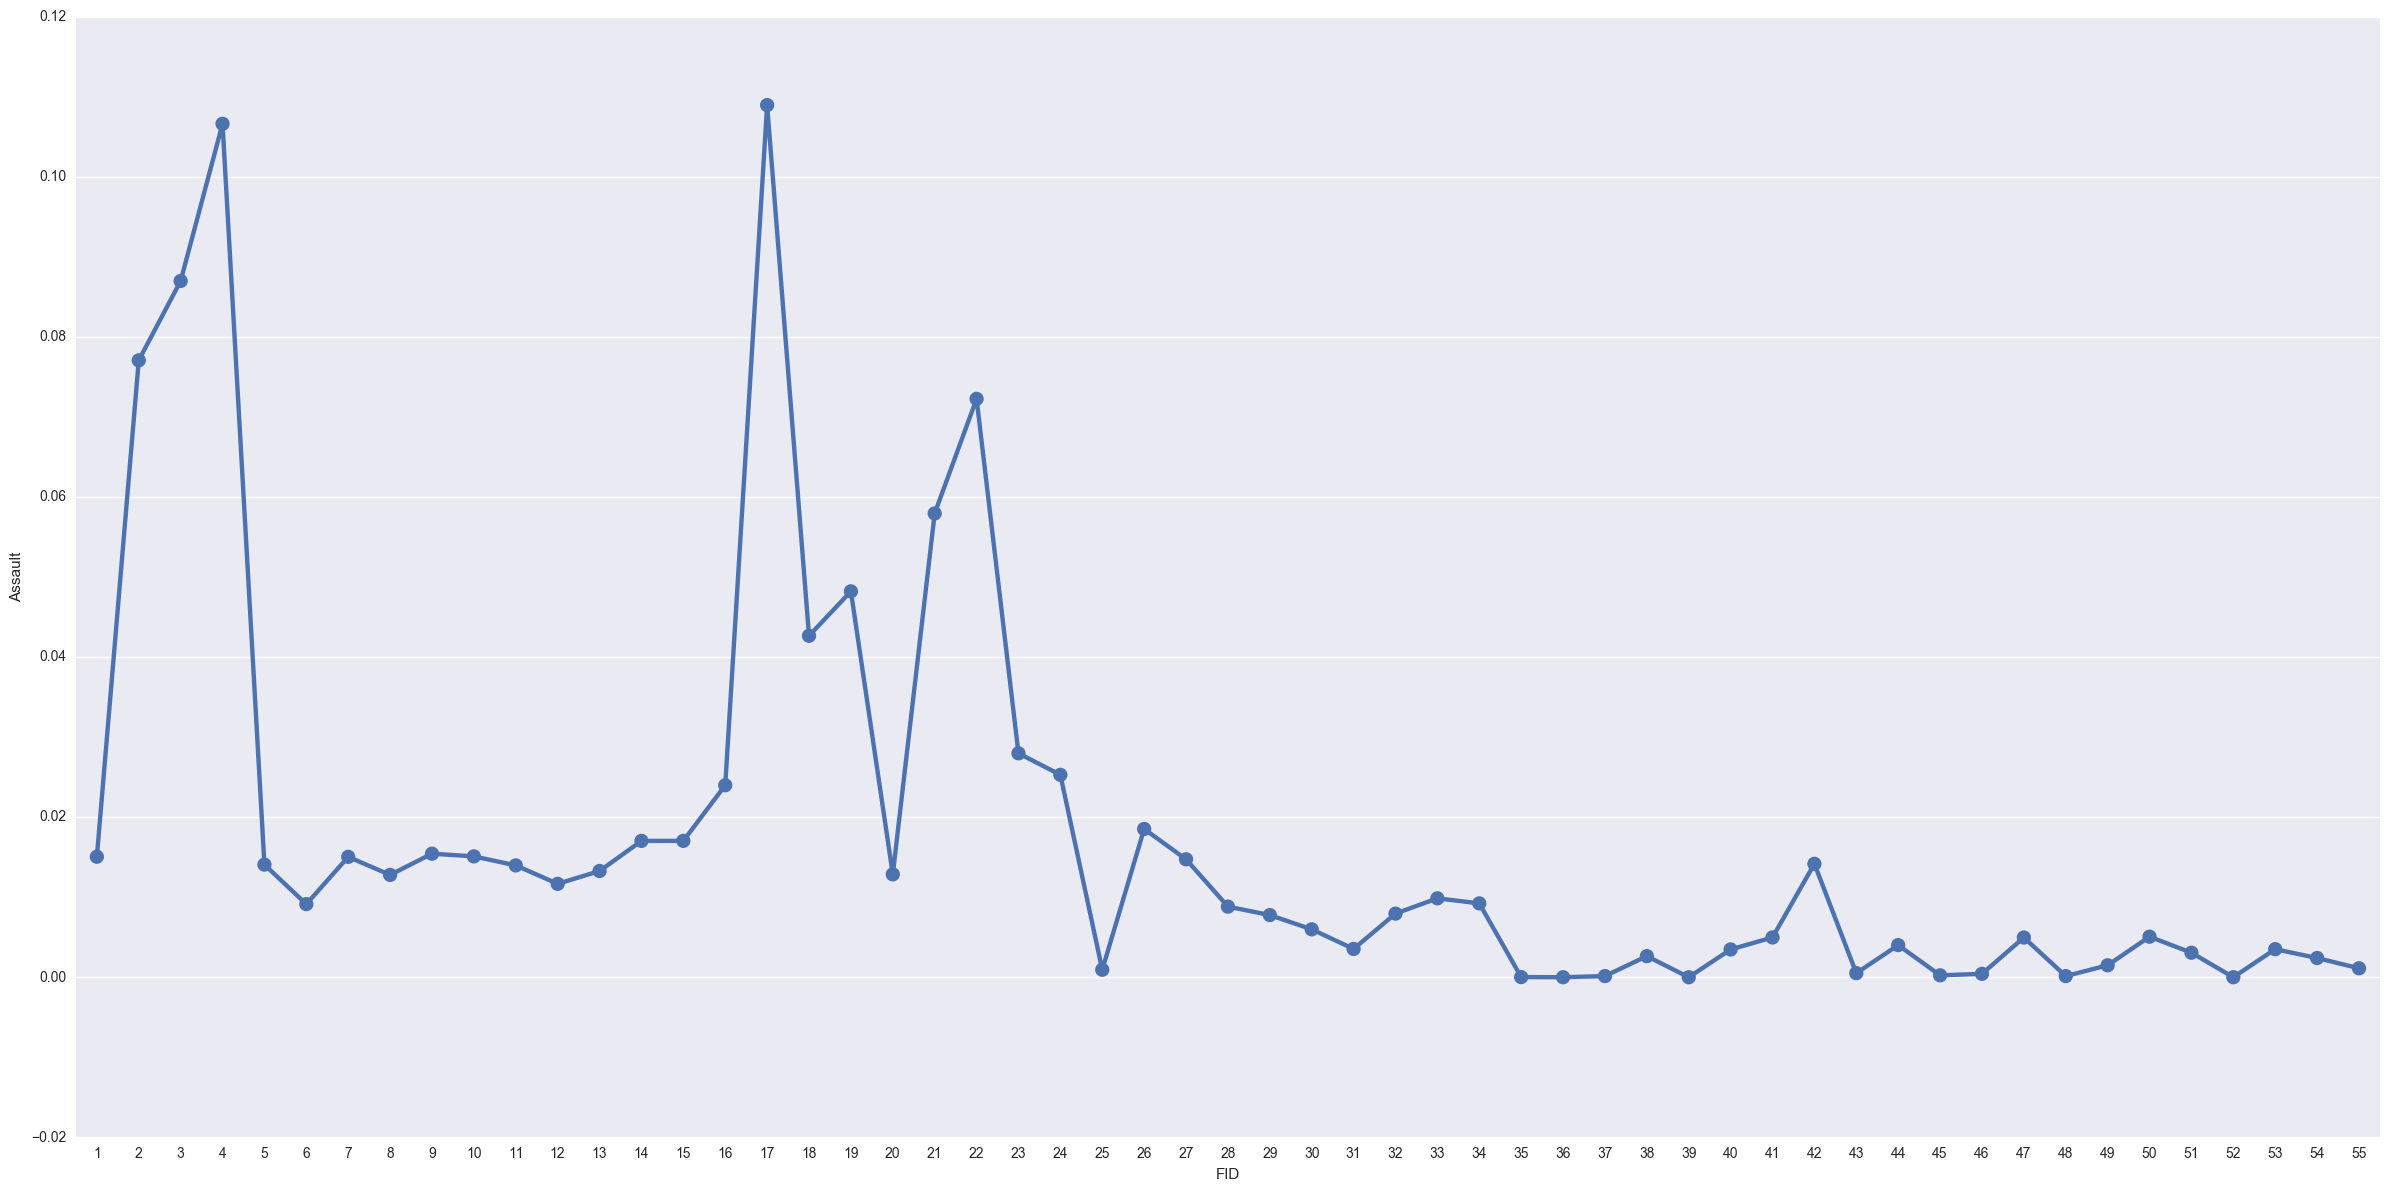

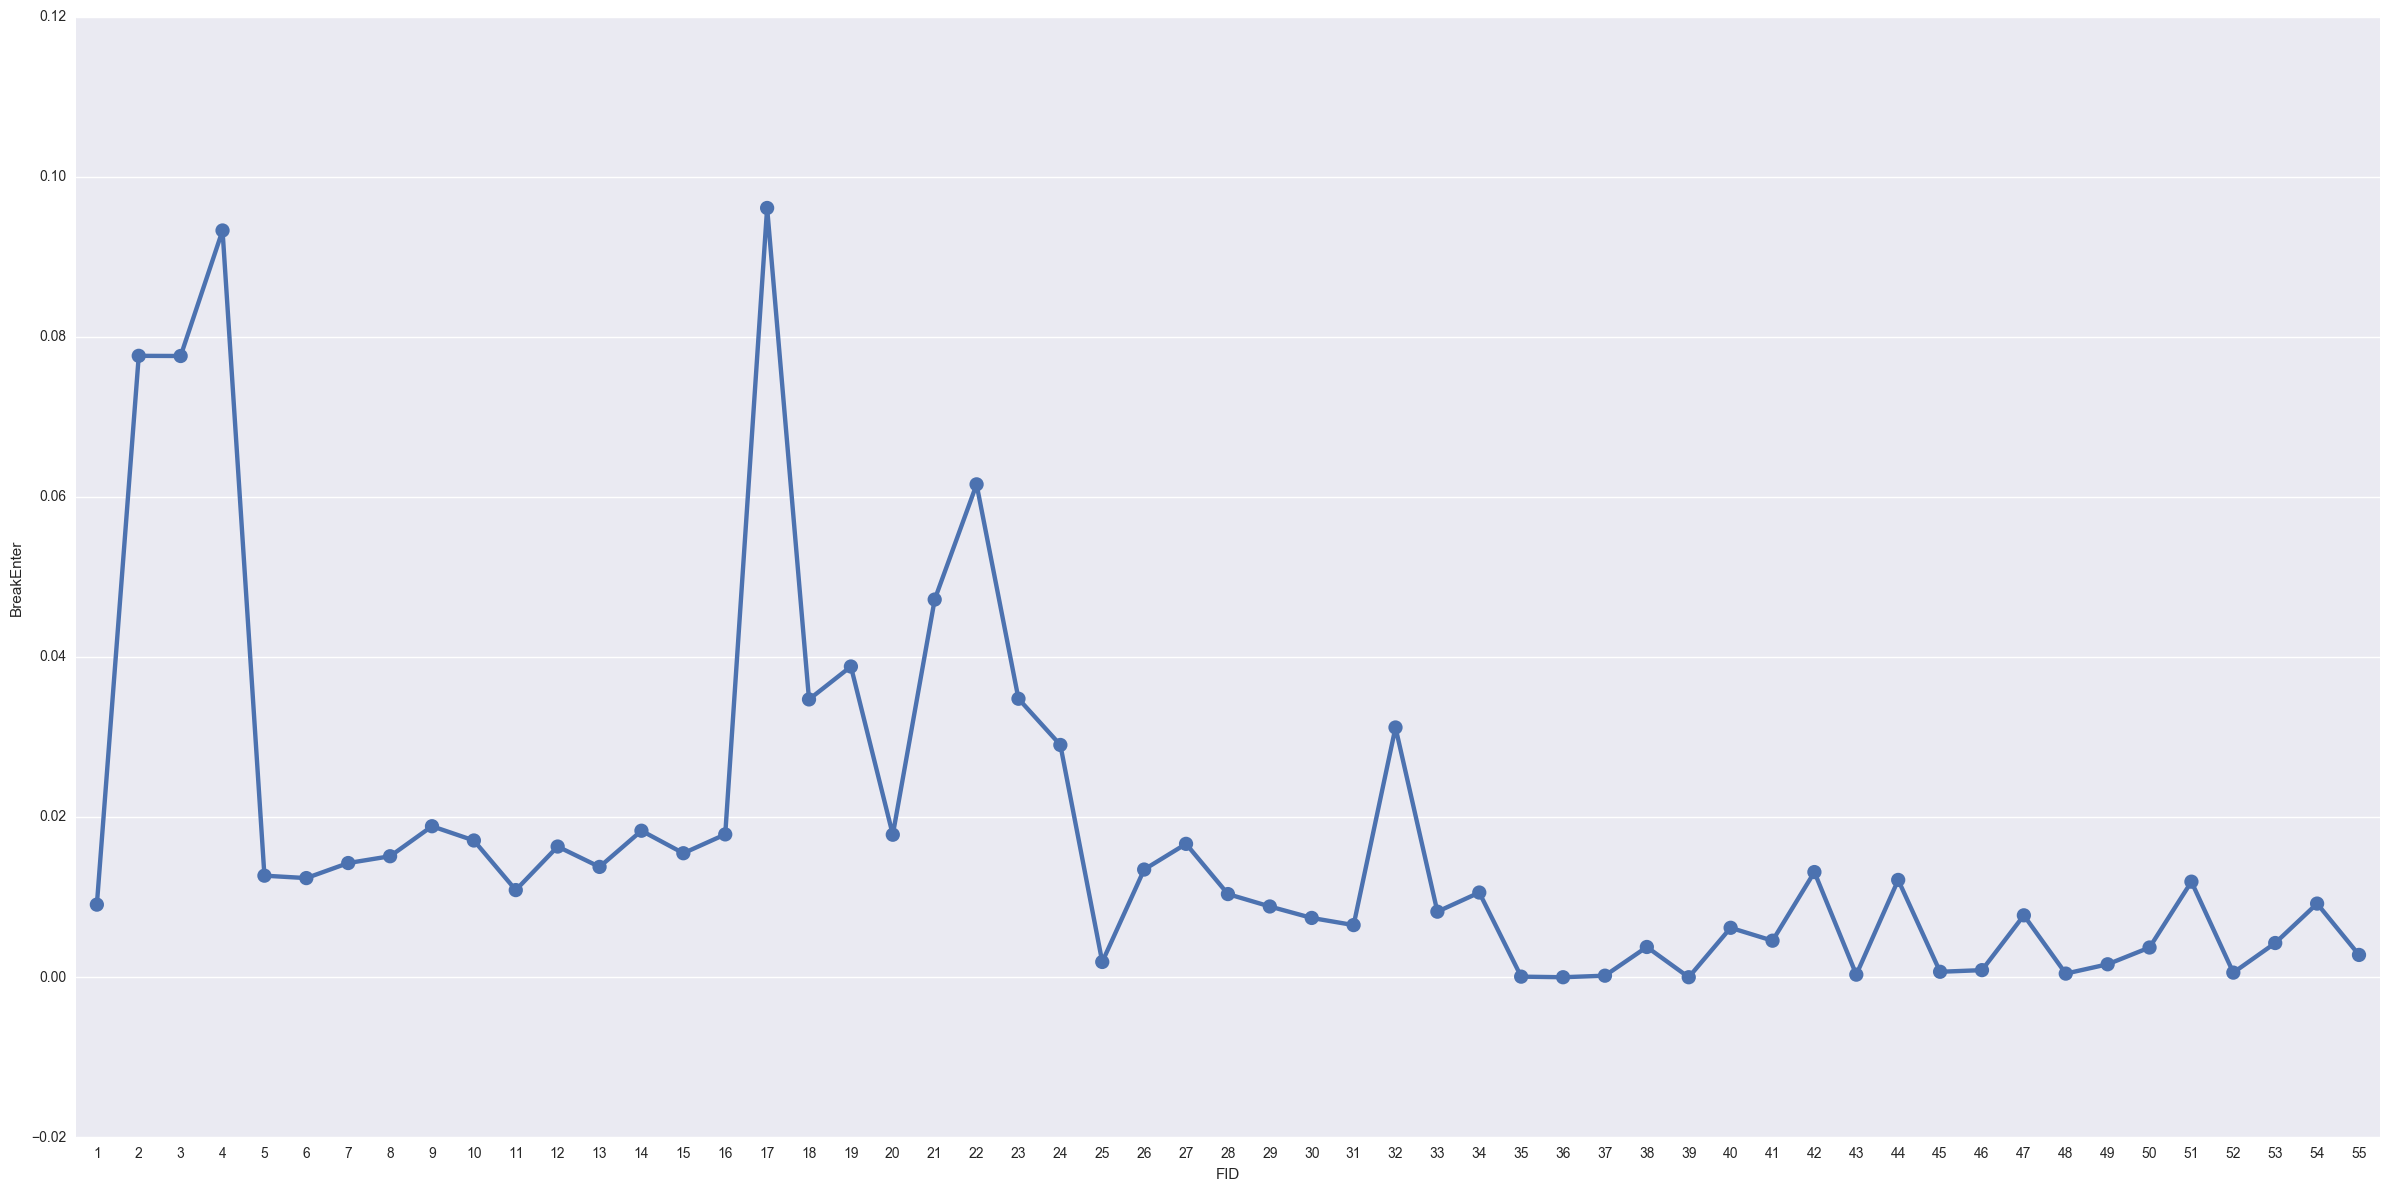

In [245]:
sb.factorplot(x = "FID", y = "Assault", data = FIRFdf, kind = "point", size = 12, aspect =2)
sb.factorplot(x = "FID", y = "BreakEnter", data = FIRFdf, kind = "point", size = 12, aspect =2)

~~Robbery is the least frequent Crimes - number 10 out of the Top 10. Notice the Y axis is less than 0.40 where as with Assault the most fequent Crime group is close to 1.0. This is maximum possible feature importance when related to the whole crime group where frequency of that event is related. Maybe should remove this as a predictor - maybe this is maying my model super biast~~

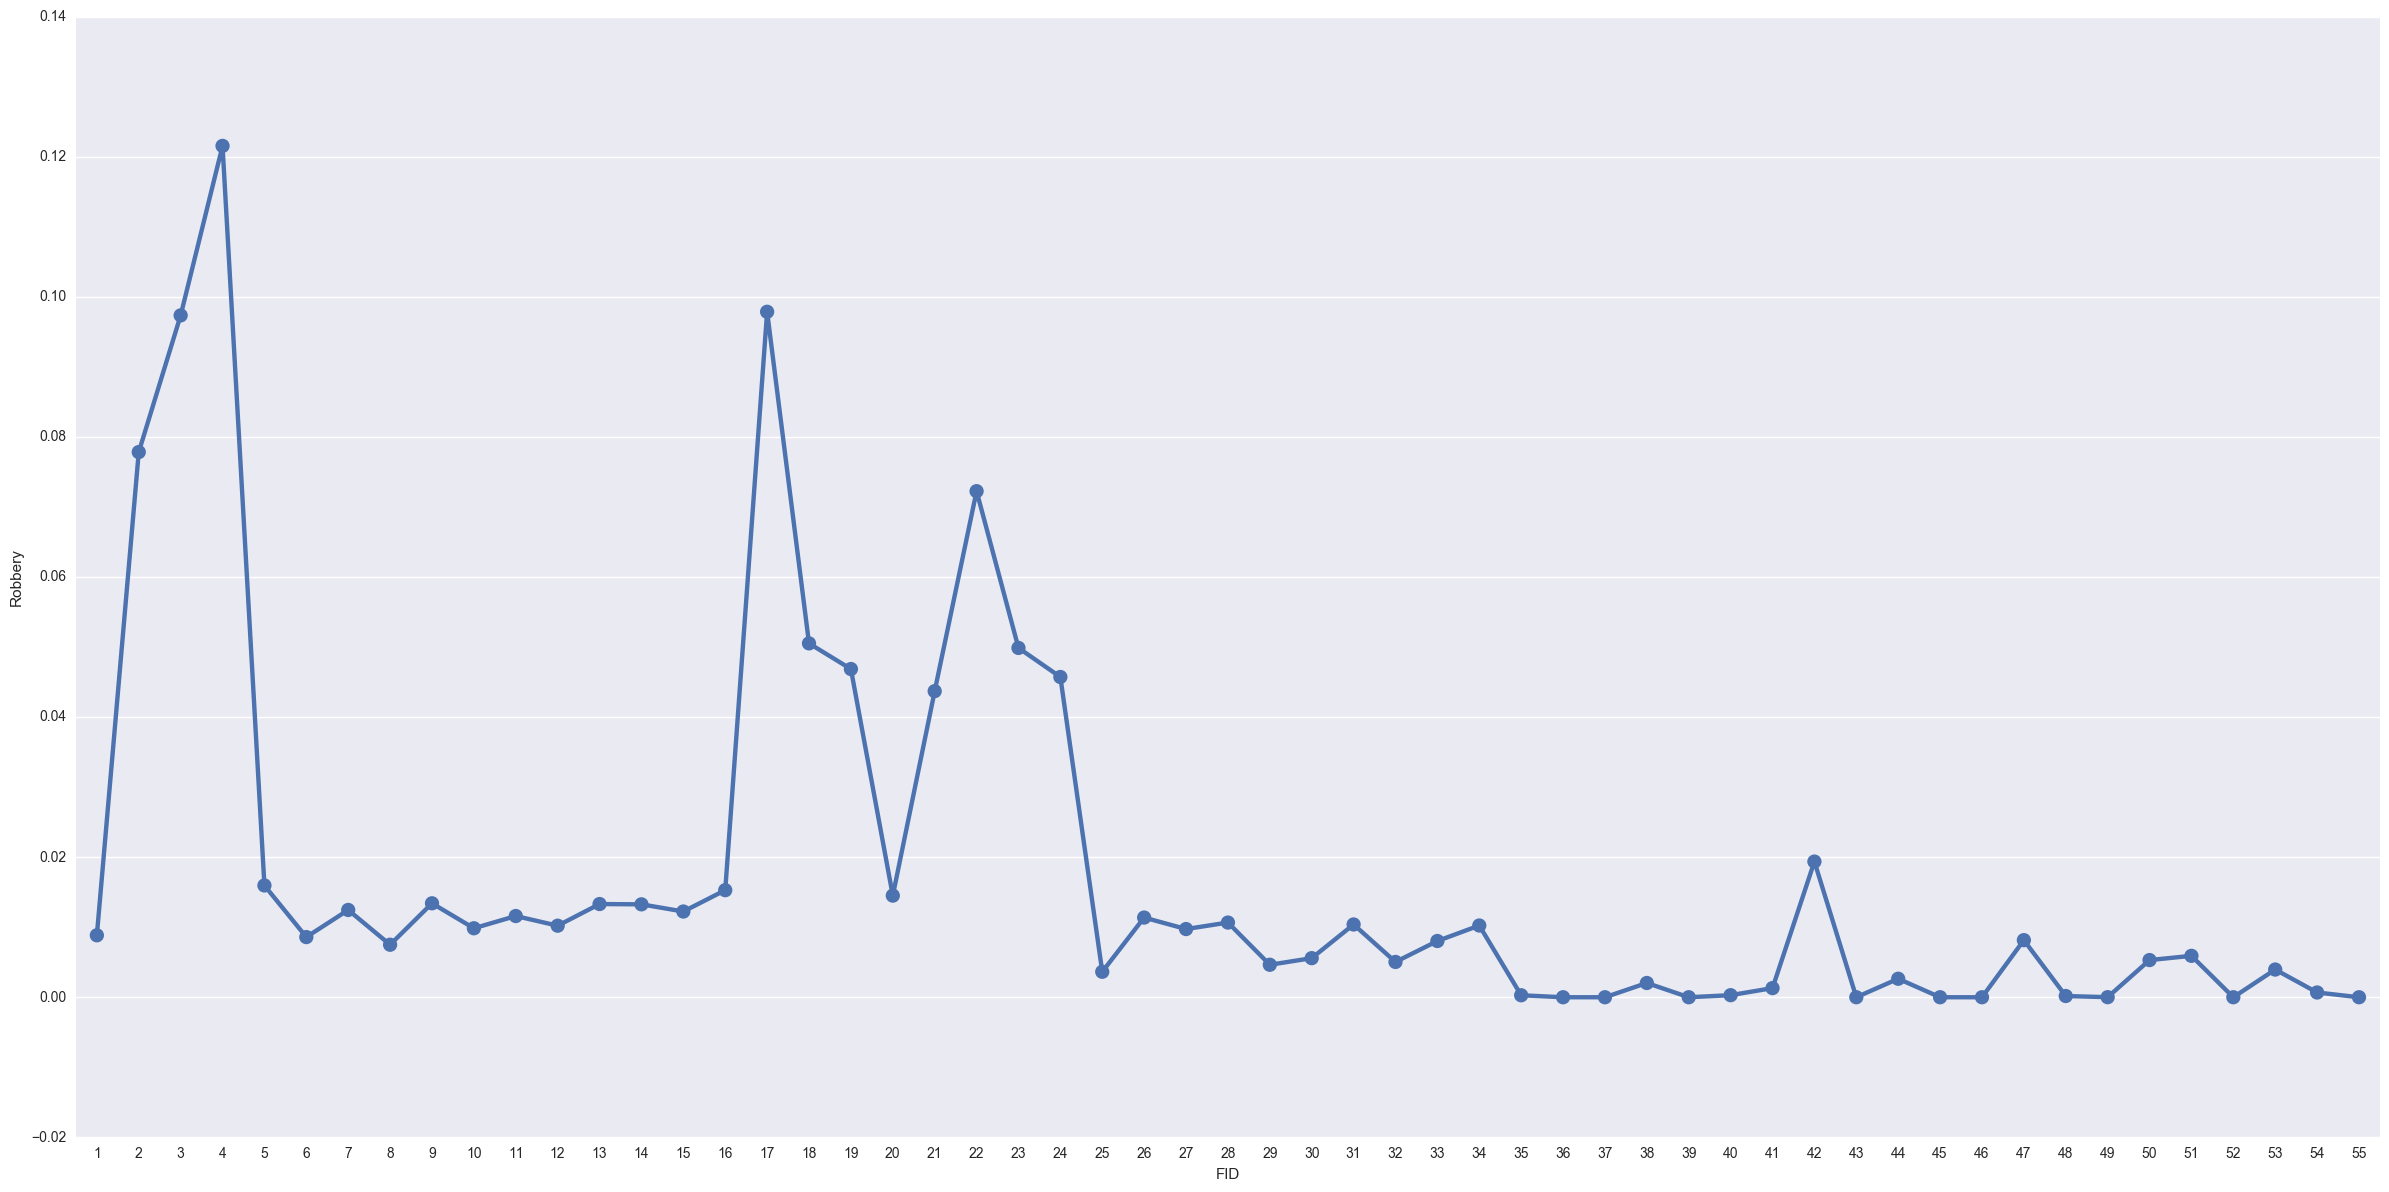

In [244]:
sb.factorplot(x = "FID", y = "Robbery", data = FIRFdf, kind = "point", size = 12, aspect =2) 

In [107]:
FI

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [108]:
FIRFdf.shape

(56, 11)

In [246]:
ZoneSectionRF = FIRFdf.iloc[44:56]
ZoneSectionRF
# Zoning Section from Random Forest Model

,Assault,BreakEnter,DUI,Disorder,Drugs,FamilyOffense,PropertyCrime,Robbery,Theft,Traffic,FID
Predictors,,,,,,,,,,,
ZoningGroup_Agriculture,0.000238,0.000681,0.000000,0.000105,0.000722,0.000173,0.000707,0.000000,0.000209,0.000403,45
ZoningGroup_CUP,0.000425,0.000887,0.000001,0.001082,0.000067,0.000562,0.000249,0.000000,0.000631,0.000347,46
ZoningGroup_Commercial,0.004962,0.007733,0.002543,0.006115,0.006946,0.002188,0.003736,0.008152,0.015493,0.004796,47
ZoningGroup_Industrial,0.000142,0.000453,0.000201,0.000438,0.000000,0.000132,0.000263,0.000175,0.000032,0.000683,48
ZoningGroup_MIX,0.001493,0.001618,0.001138,0.001158,0.000300,0.000147,0.002234,0.000010,0.001437,0.000512,49
ZoningGroup_Multi_Dwelling,0.005065,0.003712,0.004430,0.005772,0.003826,0.002787,0.004437,0.005308,0.003614,0.003412,50
ZoningGroup_Multi_Family,0.003061,0.011938,0.001083,0.002324,0.004335,0.003518,0.003306,0.005912,0.003090,0.002657,51
ZoningGroup_NUP,0.000000,0.000575,0.000000,0.001013,0.000000,0.000000,0.000042,0.000000,0.000233,0.000081,52
ZoningGroup_Office,0.003506,0.004274,0.001913,0.004259,0.002389,0.002414,0.006110,0.003956,0.006904,0.004222,53


In [247]:
ZoneSectionDT = FITDdf.iloc[44:56]
ZoneSectionDT
# Zoning Section from Decision Tree Model

,Assault,BreakEnter,DUI,Disorder,Drugs,FamilyOffense,PropertyCrime,Robbery,Theft,Traffic
Predictors,,,,,,,,,,
ZoningGroup_Agriculture,0.000100,0.000492,0.000105,0.000412,0.000054,0.000000,0.000254,0.000162,0.000452,0.000280
ZoningGroup_CUP,0.002529,0.001438,0.000707,0.001892,0.000168,0.000848,0.000909,0.002758,0.001068,0.000388
ZoningGroup_Commercial,0.004676,0.004019,0.004407,0.004324,0.006673,0.002469,0.006115,0.005766,0.006110,0.004351
ZoningGroup_Industrial,0.000130,0.000202,0.000465,0.000539,0.000000,0.000456,0.000312,0.001969,0.000000,0.000810
ZoningGroup_MIX,0.000269,0.001409,0.000412,0.002245,0.001298,0.002107,0.001731,0.002648,0.001207,0.000482
ZoningGroup_Multi_Dwelling,0.012885,0.006049,0.000910,0.003973,0.004883,0.004748,0.005235,0.006635,0.011154,0.000678
ZoningGroup_Multi_Family,0.005897,0.006837,0.001084,0.002580,0.002135,0.004334,0.005960,0.004801,0.004084,0.000553
ZoningGroup_NUP,0.000493,0.000276,0.000000,0.000284,0.000000,0.000000,0.000348,0.000150,0.000147,0.000000
ZoningGroup_Office,0.003909,0.016453,0.003890,0.003798,0.003250,0.004071,0.005604,0.007359,0.004523,0.001288


## Difference between Frequency of an Event and Model Feature Importance of an Event

In [248]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [249]:
import seaborn as sb
%matplotlib inline

Frequency does not necessarily equate Model Feature Importance. The first bar frequency chart is how often Theft occures at each Zoning Group type from the dfMCats Data Frame. The second bar frequency chart is the Random Forest Feature Importance score from the Zoning Section of the Random Forest Feature Importance Model Data Frame. <br/>
Assalut occures at greatest frequency at "Multi-Dwelling" and "Mulit-Family" Zone types <br/>
The most _important_ feature according to the Random Forest Model for Assault was also "Multi - Dwelling" then "Commercial" Zone types. <br/>
Size of feature importance plot seems to be some what corresponding to the Confidenc Interval in the bar plot.

`kind : {``point``, ``bar``, ``count``, ``box``, ``violin``, ``strip``}`

{' ': 0,
 'Agriculture': 1,
 'CUP': 2,
 'Commercial': 3,
 'Industrial': 4,
 'MIX': 5,
 'Multi_Dwelling': 6,
 'Multi_Family': 7,
 'NUP': 8,
 'Office': 9,
 'Single_Family': 10,
 'Townhouse': 11}

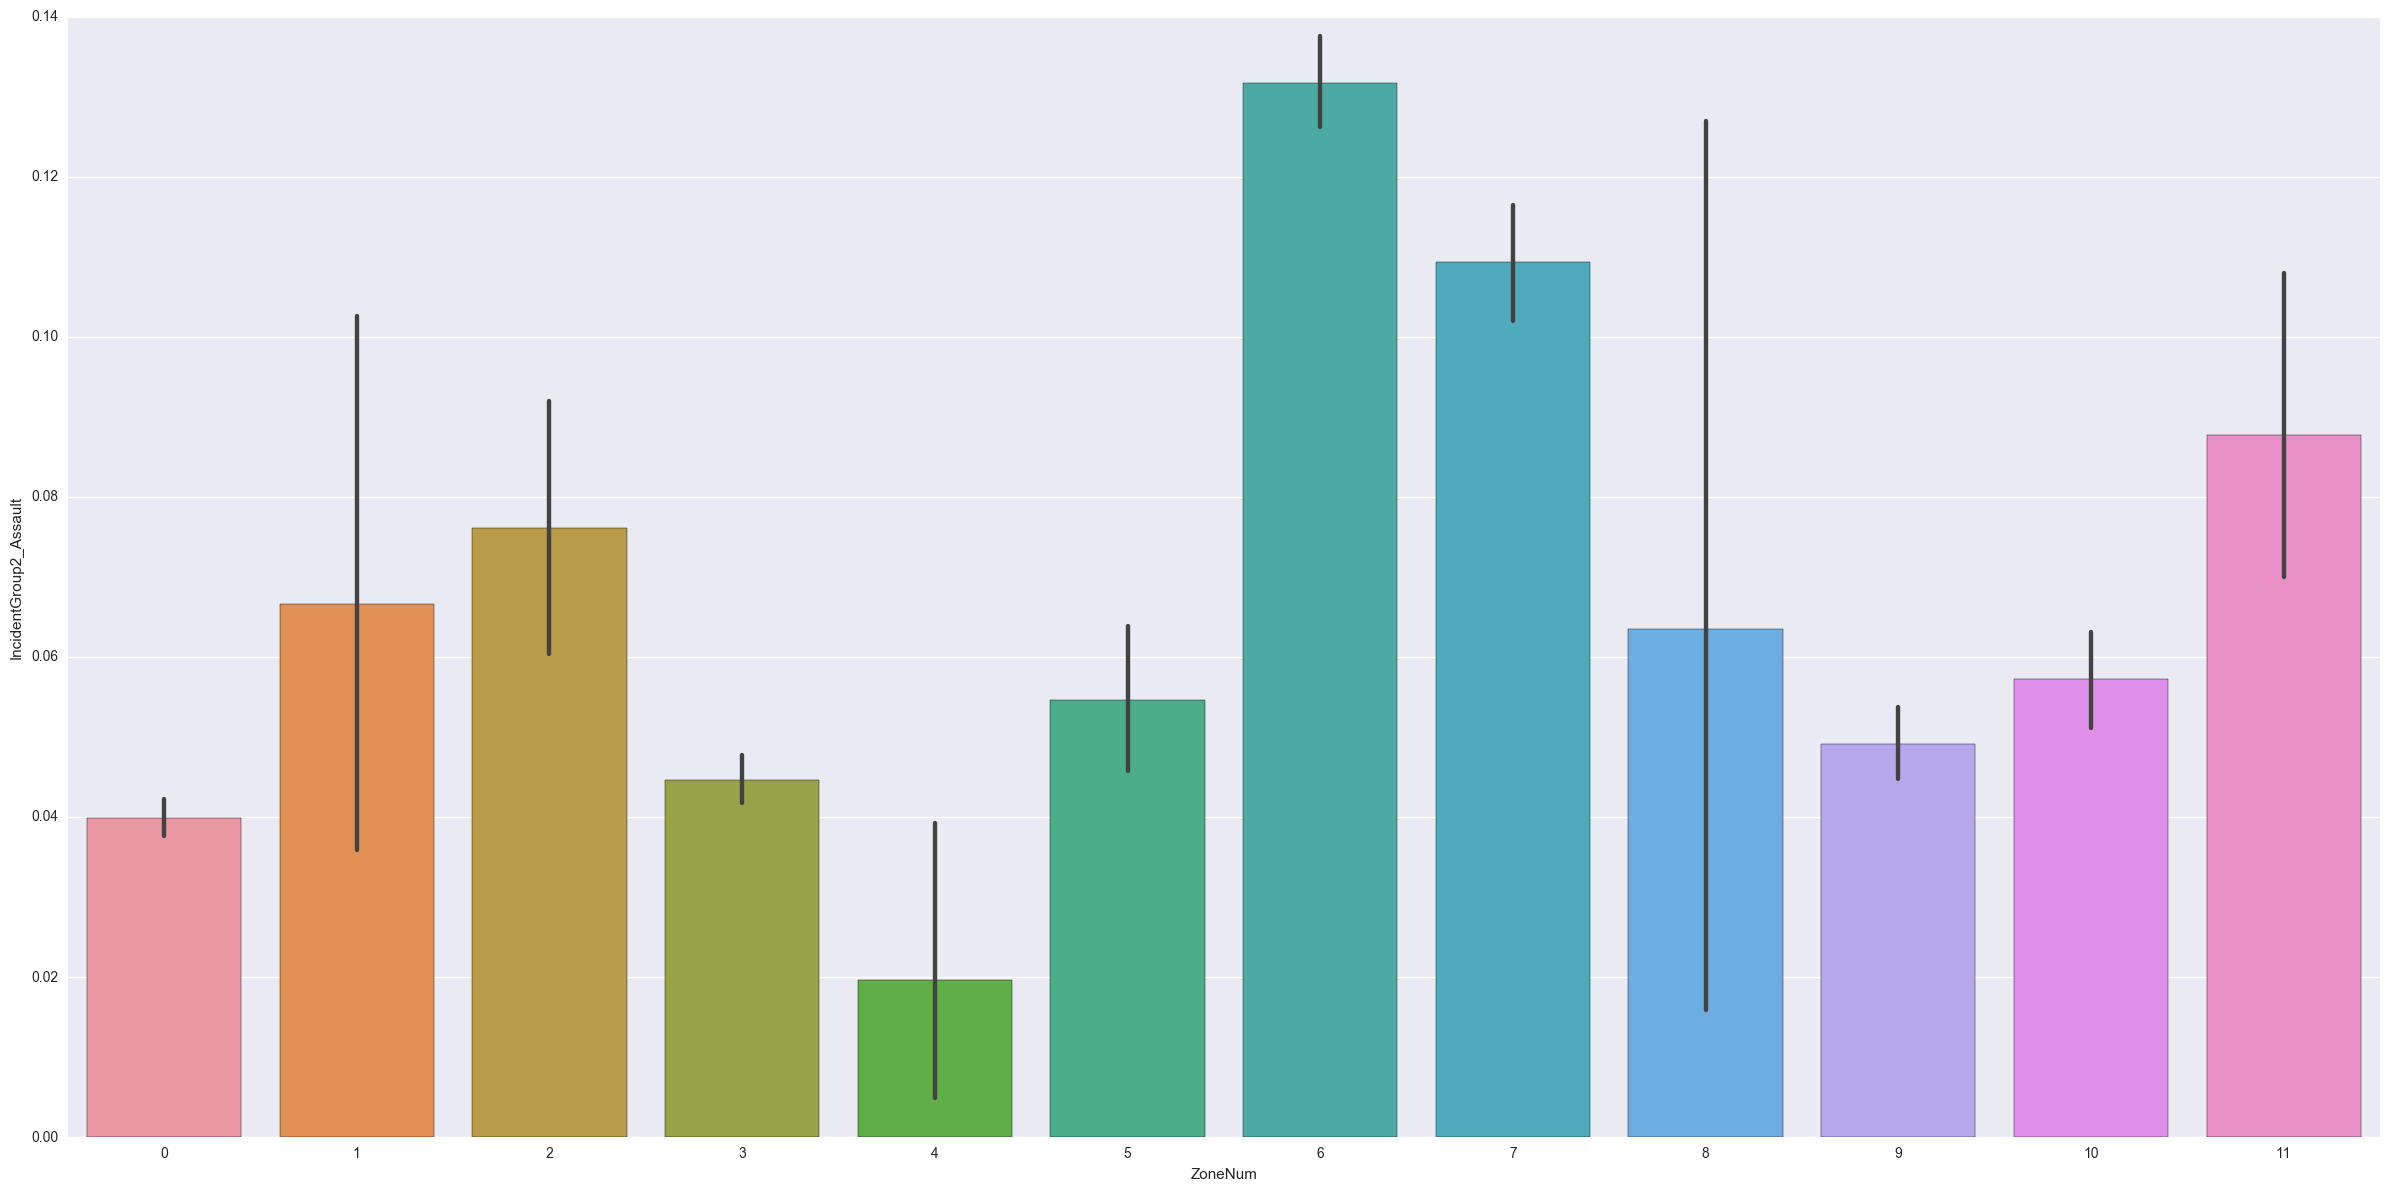

In [250]:
sb.factorplot(x = "ZoneNum", y = "IncidentGroup2_Assault", data = dfMCats, kind = "bar", size = 12, aspect =2)
ZoneNum
# Frequency of Assault by Zone Type

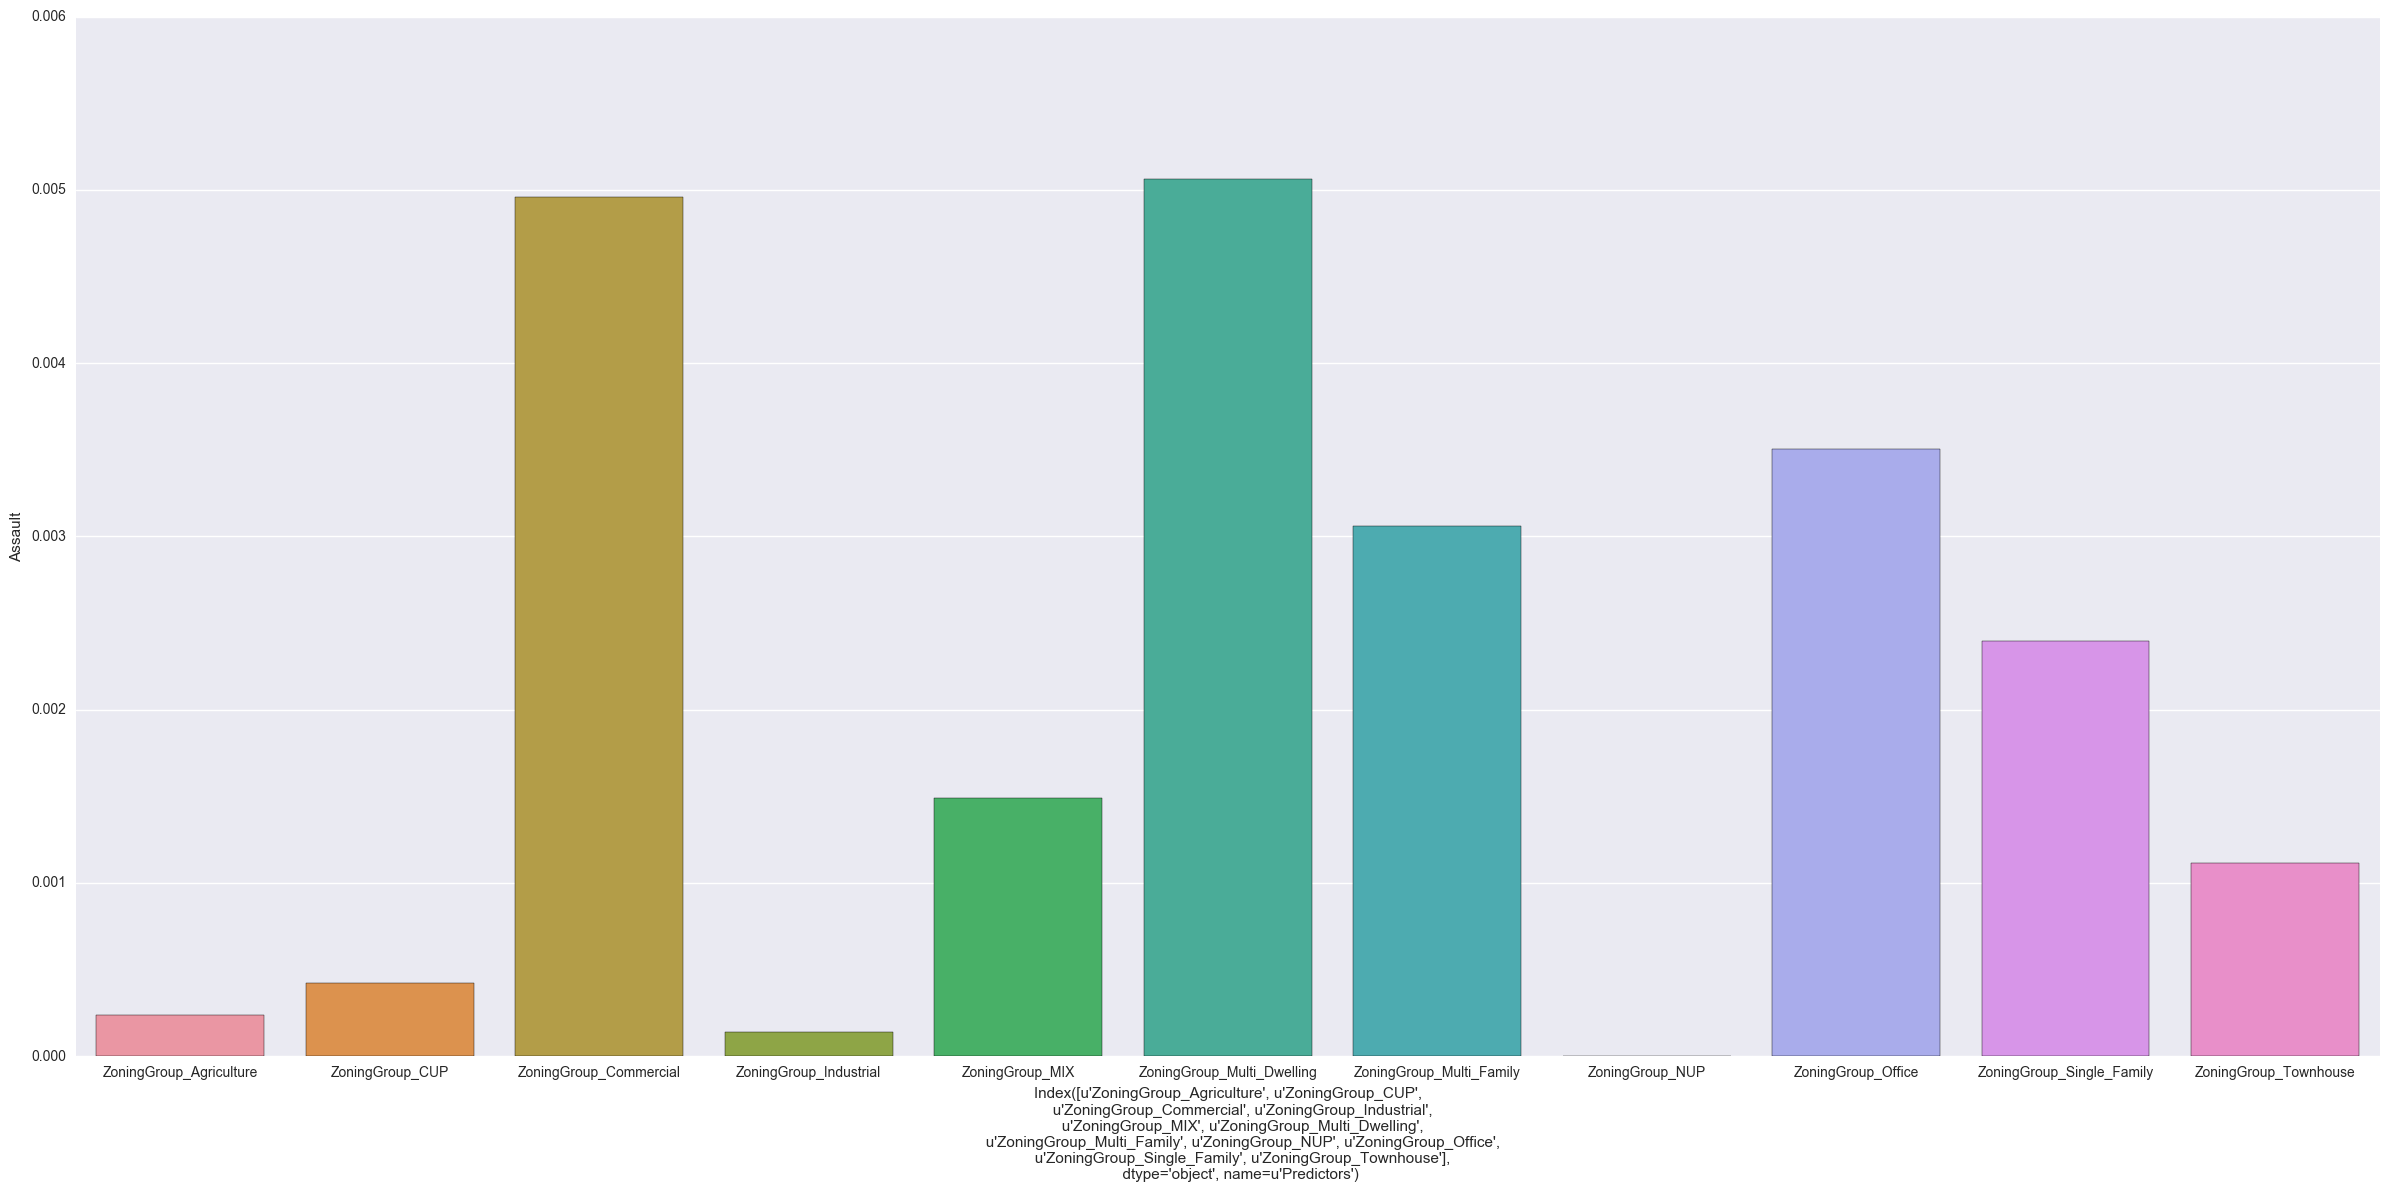

In [252]:
sb.factorplot(x= ZoneSectionRF.index, y="Assault", data=ZoneSectionRF, kind="bar", size=12, aspect=2)
# Random Forest Feature Importance

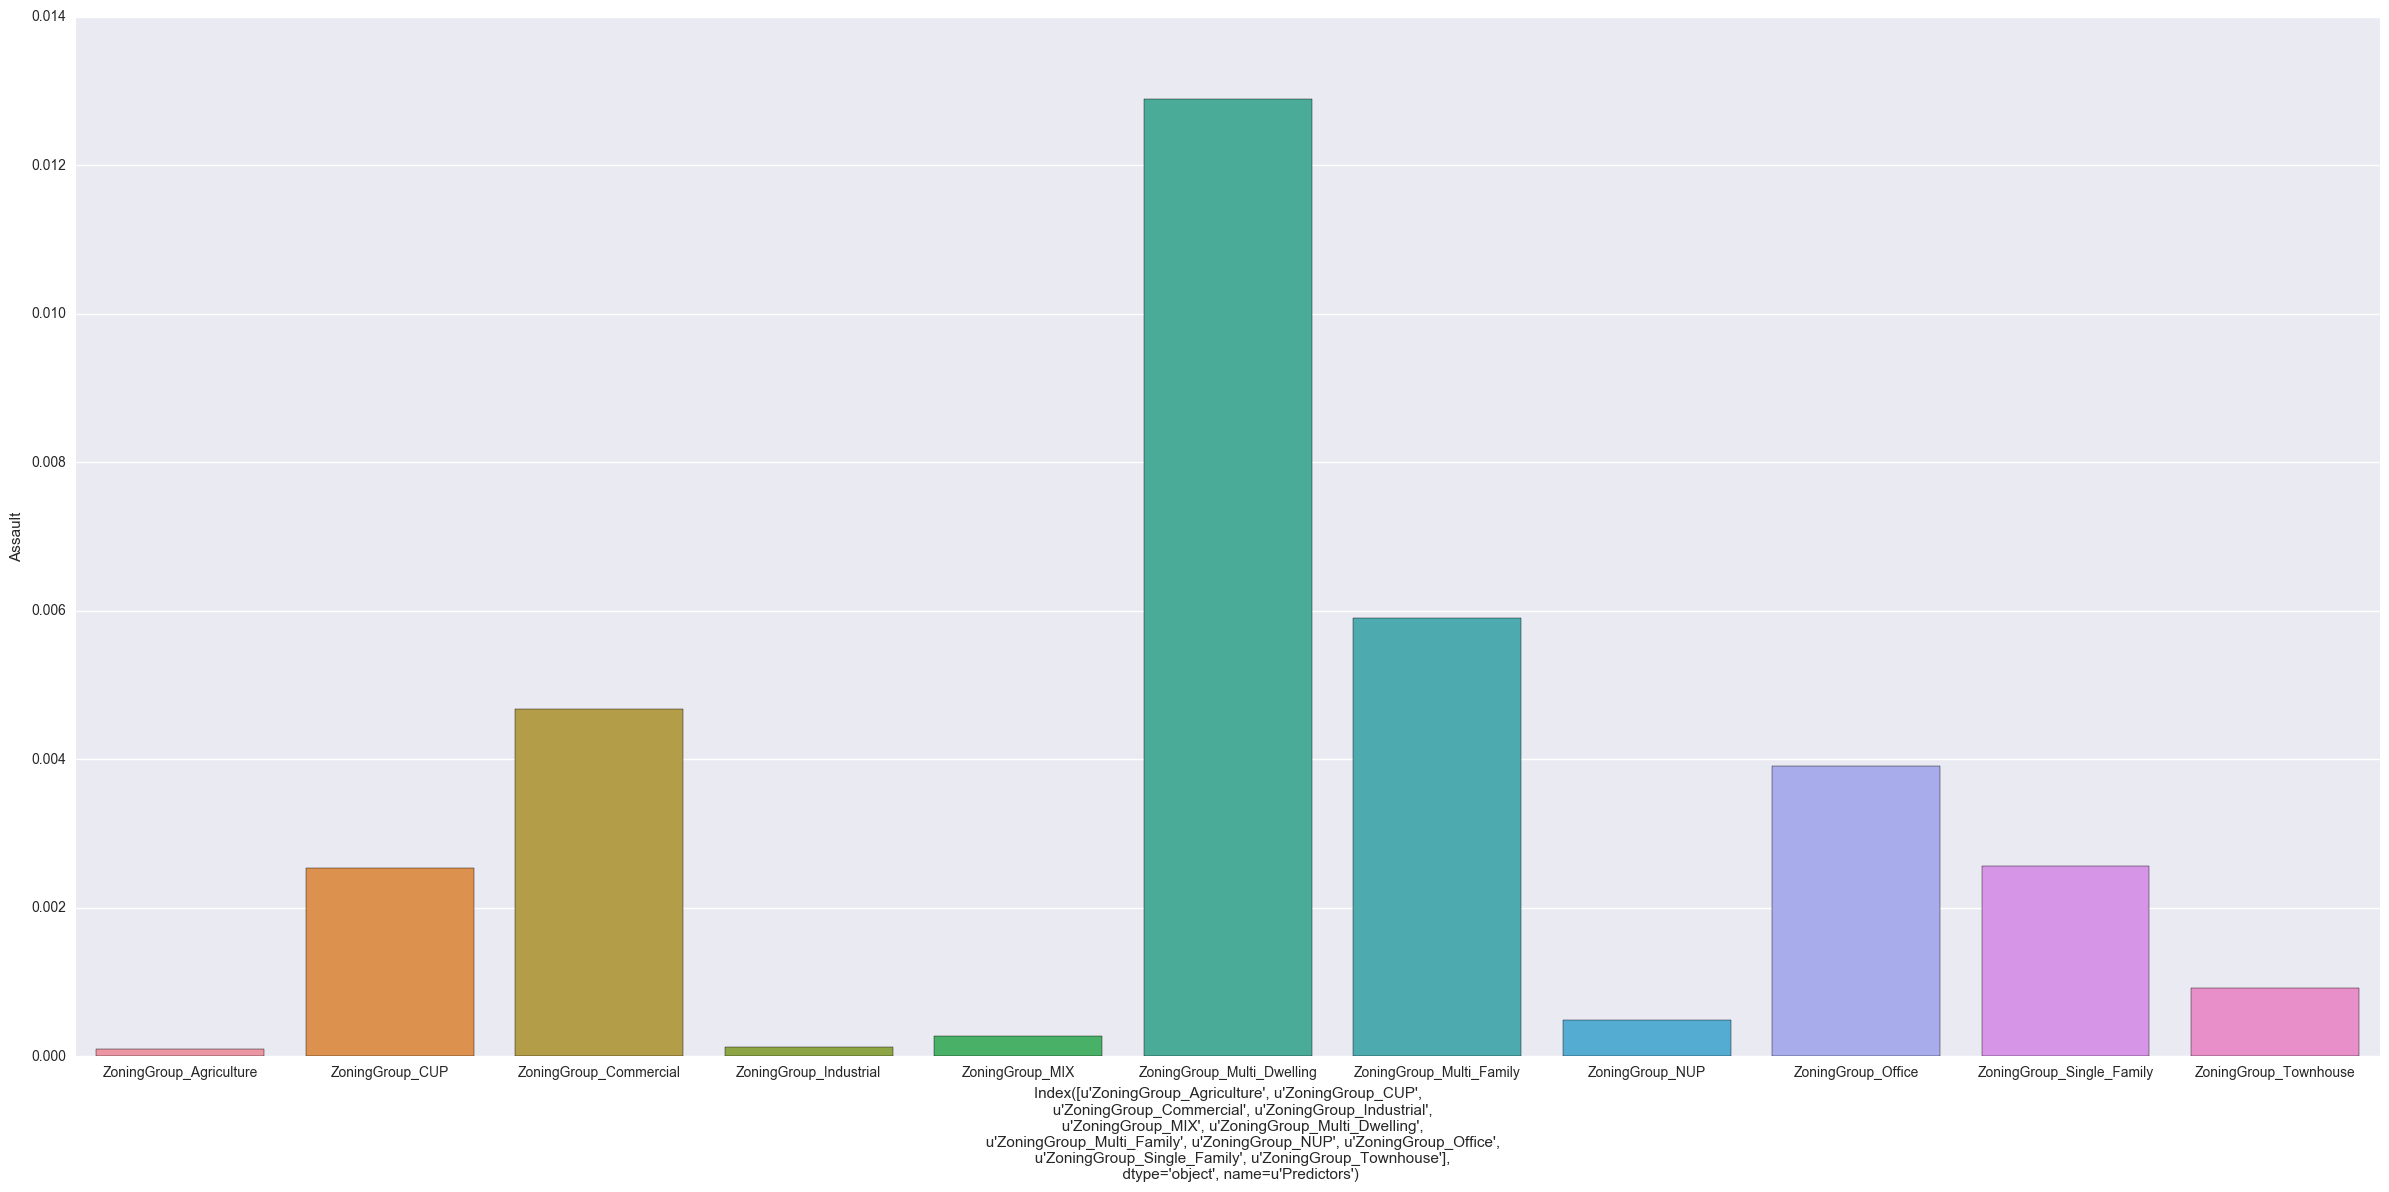

In [253]:
sb.factorplot(x= ZoneSectionDT.index, y="Assault", data=ZoneSectionDT, kind="bar", size=12, aspect=2)
# Decision Tree Feature Importance 

In [254]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn import metrics

In [255]:
print dfMCats.IncidentGroup2_Assault.value_counts()
print dfMCats['IncidentGroup2_Assault'].shape
print y_test_Assault.shape

0.0    80317
1.0     5444
Name: IncidentGroup2_Assault, dtype: int64
(85761L,)
(21441L,)


Random Forest Predicted Y

In [256]:
y_pred_Assault = modelRF_Assault.fit(X_train, y_train_Assault).predict(X_test)
y_pred_Assault
y_pred_Assault.shape

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

(21441L,)

### Assault Confusion Matrix and Accuracy Score

In [257]:
import matplotlib.pyplot as plt

Confusion Matrix Numbers 
[[18771  1371]
 [ 1136   163]]

 Classification Report 
             precision    recall  f1-score   support

        0.0       0.94      0.93      0.94     20142
        1.0       0.11      0.13      0.12      1299

avg / total       0.89      0.88      0.89     21441

Accuracy Score % 0.883074483466


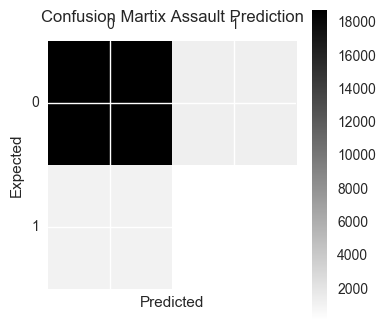

In [258]:
plt.matshow(confusion_matrix(y_test_Assault, y_pred_Assault), cmap=plt.cm.binary)
plt.title('Confusion Martix Assault Prediction')
plt.colorbar()
plt.ylabel("Expected")
plt.xlabel("Predicted")

matrix = confusion_matrix(y_test_Assault, y_pred_Assault)
print "Confusion Matrix Numbers \n", matrix
print "\n Classification Report \n", metrics.classification_report(y_test_Assault, y_pred_Assault) 
print "Accuracy Score %", metrics.accuracy_score(y_test_Assault, y_pred_Assault)

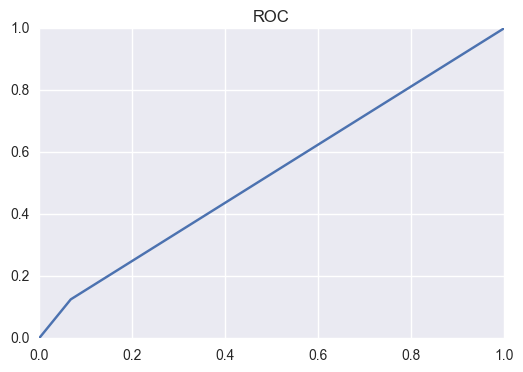

In [259]:
ax = plt.subplot(111)
val = metrics.roc_curve(y_test_Assault, y_pred_Assault)

ax.plot(val[0], val[1])
ax.set(title = "ROC")